The "Marketplace" company is launching an e-commerce marketplace where sellers offer items by posting a photo and description. Currently the categorization of the small number of products is done manually. The e-commerce site aims to expand and significantly increase the number of products, and manual categorization would be a long and unreliable step. To facilitate the posting of new articles and the search for products, it becomes necessary to automate this task. This categorization will be done from the descriptions and images of the products.

La mission est de réaliser une première étude de faisabilité d'un moteur de classification d'articles basé sur une image et une description pour l'automatisation de l'attribution de la catégorie de l'article.

### **Text Analysis**

https://towardsdatascience.com/text-normalization-for-natural-language-processing-nlp-70a314bfa646

In [1]:
# Data Structures
import numpy as np
import pandas as pd

#for visualisation
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


# Corpus Processing
import nltk
nltk.download('stopwords')
import string
import re

from nltk.tokenize import word_tokenize
from nltk.tokenize import  RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from nltk import SnowballStemmer,PorterStemmer


from sklearn.pipeline                 import make_pipeline
from sklearn.preprocessing            import Normalizer
from sklearn.preprocessing            import StandardScaler
from sklearn.preprocessing            import scale
from sklearn.preprocessing            import normalize



from sklearn.cluster import KMeans
from sklearn.manifold import TSNE


from sklearn.decomposition            import TruncatedSVD
from sklearn.decomposition            import NMF
from sklearn.decomposition            import LatentDirichletAllocation
from sklearn.decomposition            import PCA


from sklearn.metrics import confusion_matrix
from sklearn.metrics import homogeneity_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score

from sklearn.feature_extraction.text  import TfidfVectorizer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
#Download databases
flipkart= pd.read_csv('/content/drive/MyDrive/p6/flipkart_com-ecommerce_sample_1050.csv',sep=',')
data_con=flipkart.copy()

In [ ]:
data_con.head()

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree               pid  \
0  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   
1                    False  Specifications of Sathiyas Cotton Bath Towel (...   
2                    False  Key Features of Eurospa Cotton Terry Face Towe...   
3                    False  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4                    False  Key Features of Jaipur Print Cotton Floral Kin...   

        product_rating       overall_rating                  brand  \
0  No rating available  No rating available               Elegance   
1  No rating available  No rating available               Sathiyas   
2  No rating available  No rating available                Eurospa   
3  No rating available  No rating available  SANTOSH ROYAL FASHION   
4  No rating available  No rating available           Jaipur Print   

                              product_specifications  
0  {"product_specification"=>[{"key"=>"Brand", "v...  
1  {"product_specification"=>[{"key"=>"Machine Wa...  
2  {"product_specification"=>[{"key"=>"Material",...  
3  {"product_specification"=>[{"key"=>"Brand", "v...  
4  {"product_specification"=>[{"key"=>"Machine Wa...

In [ ]:
data_con.shape

(1050, 15)

In [ ]:
data_con.isnull().sum()

uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 1
discounted_price             1
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      338
product_specifications       1
dtype: int64

 ***We have some missing values!!***

---



### **Missing values and imputation**

In [ ]:
import missingno as msno

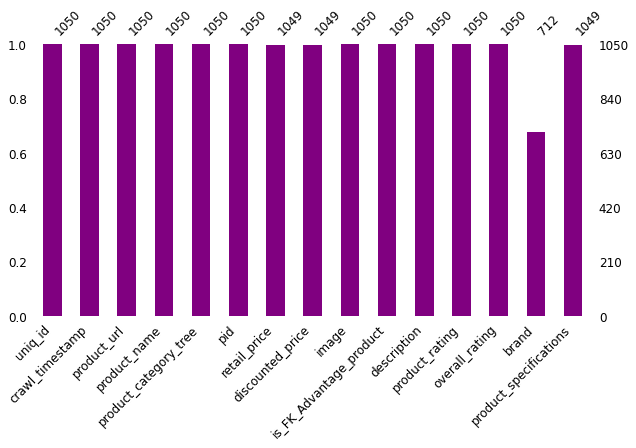

In [ ]:
msno.bar(data_con,  figsize=(10,5), fontsize=12, color="purple")

there is missing value for 'retail_price' , 'discounted_price' , 'brand' & 'product_specifications'

**Imputation**

In [4]:
data_con['retail_price'].fillna((data_con['retail_price'].median()), inplace=True)
data_con['discounted_price'].fillna((data_con['discounted_price'].median()), inplace=True)

In [5]:
data_con['brand'].fillna((data_con['brand'].mode()[0]), inplace=True)
data_con['product_specifications'].fillna((data_con['product_specifications'].mode()[0]), inplace=True)

In [ ]:
data_con.isnull().sum()

uniq_id                    0
crawl_timestamp            0
product_url                0
product_name               0
product_category_tree      0
pid                        0
retail_price               0
discounted_price           0
image                      0
is_FK_Advantage_product    0
description                0
product_rating             0
overall_rating             0
brand                      0
product_specifications     0
dtype: int64

### **Data Exploration**

In [6]:
data = data_con.filter(items=['image', 'product_name', 'product_category_tree', 'description'])

## **Cleaning dataset & visualisation**

### Product Name

In [ ]:
data['product_name'].unique()

array(['Elegance Polyester Multicolor Abstract Eyelet Door Curtain',
       'Sathiyas Cotton Bath Towel',
       'Eurospa Cotton Terry Face Towel Set', ...,
       'Uberlyfe Extra Large Pigmented Polyvinyl Films (Imported) Sticker',
       'Wallmantra Medium Vinyl Sticker Sticker',
       'Uberlyfe Large Vinyl Sticker'], dtype=object)

In [ ]:
data['product_category_tree'].sample(5)

152    ["Kitchen & Dining >> Coffee Mugs >> Prithish ...
546    ["Watches >> Wrist Watches >> Maxima Wrist Wat...
951    ["Home Decor & Festive Needs >> Religion & Dev...
129    ["Kitchen & Dining >> Coffee Mugs >> Prithish ...
895          ["Home Furnishing >> Bath Linen >> Towels"]
Name: product_category_tree, dtype: object

In [ ]:
data['description'].sample(5)

171    Buy Prithish We're All Mad Here Ceramic Mug fo...
295    arnavs Multi1 Bottle Opener Set Price: Rs. 250...
15     Escort E-1700-906_Blk Analog Watch  - For Men,...
376    Flipkart.com: Buy Denver Hamilton Pride Combo ...
739    Buyer's Beach BB349 (Brown) Price: Rs. 449 Sty...
Name: description, dtype: object

**Cleaning 'product_category_tree' column**

In [ ]:
data['product_category_tree'][1]

'["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y..."]'

In [7]:
data['category']=data['product_category_tree'].str.split(
    pat=">>",expand=True)[0]
data["category"] = data["category"].str.replace('[', "")
data["category"] = data["category"].str.replace('"', "")
data["category"] = data["category"].str.replace(' ', "")

catg  = {'HomeFurnishing':'Home',
         'HomeDecor&FestiveNeeds':'Decor',
         'Watches':'Watches',
         'BabyCare':'Baby',
         'BeautyandPersonalCare':'Beauty',
         'Computers':'Computers',
         'Kitchen&Dining':'Kitchen'}
data['category'] =[catg[i] for i in data['category']]
cluster  = {'Baby':0,
           'Decor':1,
           'Computers':2,
           'Watches':3,
           'Kitchen':4,
           'Home':5,
           'Beauty':6}

y_true = data['category'].map(cluster)

In [8]:
data['category_1']=data['product_category_tree'].str.split(
    pat=">>",expand=True)[1]
data["category_1"] = data["category_1"].str.replace('[', "")
data["category_1"] = data["category_1"].str.replace('"', "")
data["category_1"] = data["category_1"].str.replace(' ', "")

In [ ]:
# for the error: "Transport endpoint is not connected"
"""!fusermount -u drive
!google-drive-ocamlfuse drive"""

'!fusermount -u drive\n!google-drive-ocamlfuse drive'

In [ ]:
data['category'].value_counts()

Decor        150
Baby         150
Beauty       150
Kitchen      150
Computers    150
Home         150
Watches      150
Name: category, dtype: int64

In [ ]:
data.describe(include='all').T

count unique  \
image                  1050   1050   
product_name           1050   1050   
product_category_tree  1050    642   
description            1050   1050   
category               1050      7   
category_1             1050     63   

                                                                     top freq  
image                               24e85c590481a7cedfe66597f253f2b2.jpg    1  
product_name           eCraftIndia Floral Single Quilts & Comforters ...    1  
product_category_tree  ["Home Furnishing >> Bed Linen >> Blankets, Qu...   56  
description            Specifications of Aroma Care Intense Color Nai...    1  
category                                                           Decor  150  
category_1                                                  WristWatches  149

In [ ]:
data.drop('product_category_tree',inplace=True, axis=1)

In [ ]:
data.head()

image  \
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3  d4684dcdc759dd9cdf41504698d737d8.jpg   
4  6325b6870c54cd47be6ebfbffa620ec7.jpg   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                                         description category  \
0  Key Features of Elegance Polyester Multicolor ...     Home   
1  Specifications of Sathiyas Cotton Bath Towel (...     Baby   
2  Key Features of Eurospa Cotton Terry Face Towe...     Baby   
3  Key Features of SANTOSH ROYAL FASHION Cotton P...     Home   
4  Key Features of Jaipur Print Cotton Floral Kin...     Home   

             category_1  
0  Curtains&Accessories  
1         BabyBath&Skin  
2         BabyBath&Skin  
3              BedLinen  
4              BedLinen

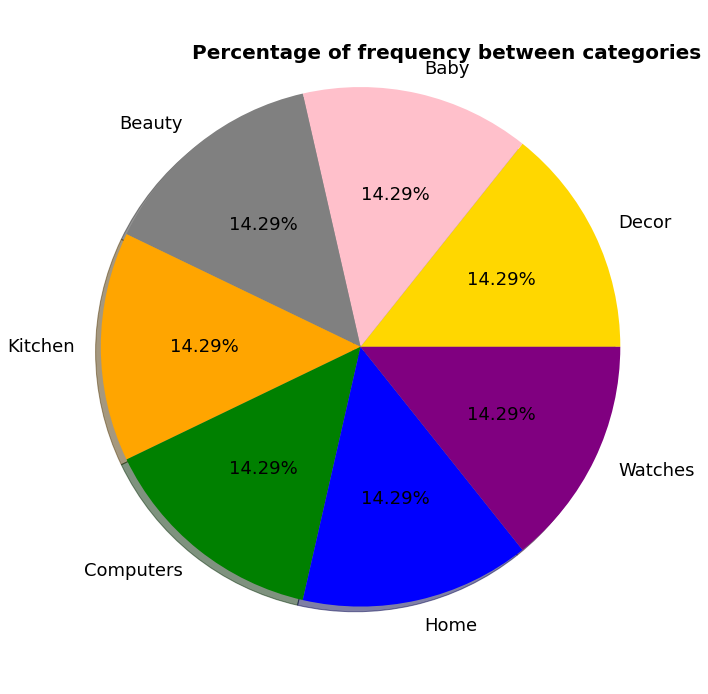

In [ ]:
values = data['category'].value_counts()
labels = data['category'].value_counts().index
colors = ['gold', 'pink', 'grey', 'orange', 'green', 'blue', 'purple']
explode = (0, 0, 0, 0, 0, 0, 0)

# Plot
plt.figure(figsize=(10, 10))
plt.pie(values, explode=explode, labels=labels, colors=colors,
        autopct='%.2f%%', shadow=True, textprops={'fontsize': 18})

ttl = plt.title( "Percentage of frequency between categories",  fontweight = 'bold' ,fontsize=20,pad=50)

ttl.set_position([0.65, 0.85])
plt.axis('equal')
plt.tight_layout()

In [ ]:
pd.set_option('display.max_row',62)
data['category_1'].value_counts().head(20)
#Nous avons 62 catégories 
#c'est plus détaille que les categories de la colonne cat_lvl1

WristWatches              149
LaptopAccessories          87
InfantWear                 84
CoffeeMugs                 74
Showpieces                 71
Fragrances                 65
BedLinen                   65
NetworkComponents          49
Cookware                   27
TableDecor&Handicrafts     27
CombosandKits              24
WallDecor&Clocks           22
BathLinen                  21
Curtains&Accessories       19
Makeup                     18
BodyandSkinCare            15
BabyBedding                15
Baby&KidsGifts             15
Kitchen&DiningLinen        14
KitchenTools               14
Name: category_1, dtype: int64

### **Text Preprocessing**

* remove punctional
* keep only alphabetic characters
* remove stopwords and isolated letters
* put all words in lowercase
* lemmatization
* keep only the canonical forms of words



In [ ]:
data['description'].head()

0    Key Features of Elegance Polyester Multicolor ...
1    Specifications of Sathiyas Cotton Bath Towel (...
2    Key Features of Eurospa Cotton Terry Face Towe...
3    Key Features of SANTOSH ROYAL FASHION Cotton P...
4    Key Features of Jaipur Print Cotton Floral Kin...
Name: description, dtype: object

In [ ]:
data['description'].sample(5)

225    Lal Haveli Decorative Dholak Musician Showpiec...
747    Buy Mxofere Combo Papaya Aloevera Jasmine Rose...
343    Buy Apple AirPort Express Base Station Wireles...
865    Specifications of kawal fashion Pyjama Baby Gi...
94     Buy BeYOUtiful Copper Repouss�� - Man With Dho...
Name: description, dtype: object

In [ ]:
len(data['description'])

1050

**Function for the number of words**

In [9]:
def word_size(base,columns):
  corpus=base[columns]

  words_dico=dict()
  import re
  #importation regular expressions

  expr = re.compile("\W+",re.U) # Regular expression of segmentation on spaces
  for text in corpus: # For each comment in the corpus
    text = str(text)
    text = expr.split(text)
    for word in set(text): # Retrieving each new word
      if word not in words_dico:
        words_dico[word]=1
      else: 
          # For each word already listed: add 1 if it is found
            words_dico[word]=words_dico[word]+1

  return len(words_dico)

In [10]:
size=word_size(data,'description')
print(size)


7671



$\color{orange}{\text{1- Lower word}}$







In [11]:
data["description_clean"] = data["description"].apply(lambda x: x.lower())
data["name_clean"] = data["product_name"].apply(lambda x: x.lower())

display(data.sample(5))

image  \
243  607dc41467008ee7a8dba0276f180f63.jpg   
915  f7514f6068377bcaed80043a5e321131.jpg   
342  17a73d7c4b02ada2bfeed1115fed08a4.jpg   
714  6acca991d2353781779b866e4f96edd9.jpg   
352  833a87b0af3b84fe246d2ebf271af177.jpg   

                                          product_name  \
243                               Suruchi Kadhai 4.5 L   
915         FS Mini Klub Baby Boy's Woven Casual Shirt   
342                          Envy-1000 Force Combo Set   
714  Home Originals Abstract, Checkered Double Blan...   
352                                     Zyxel PLA-4205   

                                 product_category_tree  \
243  ["Kitchen & Dining >> Cookware >> Pots & Pans ...   
915  ["Baby Care >> Infant Wear >> Baby Boys' Cloth...   
342  ["Beauty and Personal Care >> Fragrances >> De...   
714  ["Home Furnishing >> Bed Linen >> Blankets, Qu...   
352  ["Computers >> Network Components >> Routers >...   

                                           description   category  \
243  Buy Suruchi Kadhai 4.5 L for Rs.965 online. Su...    Kitchen   
915  Key Features of FS Mini Klub Baby Boy's Woven ...       Baby   
342  Flipkart.com: Buy Envy-1000 Force Combo Set on...     Beauty   
714  Buy Home Originals Abstract, Checkered Double ...       Home   
352  Buy Zyxel PLA-4205 only for Rs. 8100 from Flip...  Computers   

            category_1                                  description_clean  \
243           Cookware  buy suruchi kadhai 4.5 l for rs.965 online. su...   
915         InfantWear  key features of fs mini klub baby boy's woven ...   
342         Fragrances  flipkart.com: buy envy-1000 force combo set on...   
714           BedLinen  buy home originals abstract, checkered double ...   
352  NetworkComponents  buy zyxel pla-4205 only for rs. 8100 from flip...   

                                            name_clean  
243                               suruchi kadhai 4.5 l  
915         fs mini klub baby boy's woven casual shirt  
342                          envy-1000 force combo set  
714  home originals abstract, checkered double blan...  
352                                     zyxel pla-4205

$\color{orange}{\text{2- Contraction}}$


we will or we shouldnt've -> we should not have.

In [12]:
!pip install contractions

     |████████████████████████████████| 321 kB 5.4 MB/s 
     |████████████████████████████████| 284 kB 43.3 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85453 sha256=b2c6f511a15de176e0dc3d26e636141de18932ae59c55aaf8894904ba0d31dd6
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [13]:
import contractions
data["description_clean"] = data["description_clean"].apply(lambda x: contractions.fix(x))
data["name_clean"] = data["name_clean"].apply(lambda x: contractions.fix(x))

display(data.sample(5))

image  \
601   5e52d6ce133e5307814f9f3eedc5806d.jpg   
1041  b1644f47c7dfa58f8c06677f2a27ee09.jpg   
958   2476ae5a5e045876aa08f5919cb3b91b.jpg   
687   d61b368146f83075937e144dab93c6a1.jpg   
94    22296bfc1c79d9dc88eabbd01220ef0c.jpg   

                                           product_name  \
601   posterchacha Ishita Personalised Custom Name H...   
1041      Wallmantra Extra Large Vinyl Stickers Sticker   
958                    M S Rugs Pink, Blue Wool Dhurrie   
687   Jovees Anjeer & Carrot Sunblock (Pack of 2) - ...   
94    BeYOUtiful Copper Repouss�� - Man With Dhol Sh...   

                                  product_category_tree  \
601   ["Kitchen & Dining >> Coffee Mugs >> postercha...   
1041  ["Baby Care >> Baby & Kids Gifts >> Stickers >...   
958   ["Home Furnishing >> Floor Coverings >> Carpet...   
687   ["Beauty and Personal Care >> Body and Skin Ca...   
94    ["Home Decor & Festive Needs >> Showpieces >> ...   

                                            description category  \
601   Key Features of posterchacha Ishita Personalis...  Kitchen   
1041  Buy Wallmantra Extra Large Vinyl Stickers Stic...     Baby   
958   Key Features of M S Rugs Pink, Blue Wool Dhurr...     Home   
687   Flipkart.com: Buy Jovees Anjeer & Carrot Sunbl...   Beauty   
94    Buy BeYOUtiful Copper Repouss�� - Man With Dho...    Decor   

           category_1                                  description_clean  \
601        CoffeeMugs  key features of posterchacha ishita personalis...   
1041   Baby&KidsGifts  buy wallmantra extra large vinyl stickers stic...   
958    FloorCoverings  key features of m s rugs pink, blue wool dhurr...   
687   BodyandSkinCare  flipkart.com: buy jovees anjeer & carrot sunbl...   
94         Showpieces  buy beyoutiful copper repouss�� - man with dho...   

                                             name_clean  
601   posterchacha ishita personalised custom name h...  
1041      wallmantra extra large vinyl stickers sticker  
958                    m s rugs pink, blue wool dhurrie  
687   jovees anjeer & carrot sunblock (pack of 2) - ...  
94    beyoutiful copper repouss�� - man with dhol sh...

$\color{orange}{\text{3- Punctual words}}$



* To add space after all punctual words

In [14]:
oldstr=data['description_clean'][0]
re.sub(r'\.([a-zA-Z])', r'. \1', oldstr)
re.sub(r'\,([a-zA-Z])', r', \1', oldstr)

'key features of elegance polyester multicolor abstract eyelet door curtain floral curtain, elegance polyester multicolor abstract eyelet door curtain (213 cm in height, pack of 2) price: rs. 899 this curtain enhances the look of the interiors.this curtain is made from 100% high quality polyester fabric.it features an eyelet style stitch with metal ring.it makes the room environment romantic and loving.this curtain is ant- wrinkle and anti shrinkage and have elegant apparance.give your home a bright and modernistic appeal with these designs. the surreal attention is sure to steal hearts. these contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. bring home the elegant curtain that softly filters light in your room so that yo

In [15]:
def add_space(oldstr):
  oldstr=re.sub(r'\.([a-zA-Z])', r'. \1', oldstr) # Add space after . & ,
  oldstr=re.sub(r'\,([a-zA-Z])', r', \1', oldstr)
  return oldstr

In [16]:
data["description_clean"] = data["description_clean"].apply(lambda x: add_space(x))

In [ ]:
data['description_clean'][0]

'key features of elegance polyester multicolor abstract eyelet door curtain floral curtain, elegance polyester multicolor abstract eyelet door curtain (213 cm in height, pack of 2) price: rs. 899 this curtain enhances the look of the interiors. this curtain is made from 100% high quality polyester fabric. it features an eyelet style stitch with metal ring. it makes the room environment romantic and loving. this curtain is ant- wrinkle and anti shrinkage and have elegant apparance. give your home a bright and modernistic appeal with these designs. the surreal attention is sure to steal hearts. these contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. bring home the elegant curtain that softly filters light in your room so th

Removing punctual words & numbers ...

In [17]:

def remove_Noise(text):
    """
        Remove URLs from a sample string
    """
    text=text.translate(str.maketrans(' ', ' ', string.punctuation)) #remove ponctuation,
    text = text.rstrip('\n')              # Removes line breaks
    text=re.sub(r"https?://\S+|www\.\S+", "  ", text)
    #html = re.compile(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});")
    #text=re.sub(html, "", text)
    text =re.sub(r'[^\x00-\x7f]',r' ', text) #Remove non-ASCII characters
    text=re.sub('\W_',' ', text)        # removes specials characters and leaves only words
    text = re.sub("\S*\d\S*","  ", text)   # removes numbers and words concatenated with numbers IE h4ck3r. Removes road names such as BR-381.
    text = re.sub("\S*@\S*\s?","  ", text) # removes emails and mentions (words with @)
    return text

In [18]:
data["description_clean"] = data["description_clean"].apply(lambda x: remove_Noise(x))
data["name_clean"] = data["name_clean"].apply(lambda x: remove_Noise(x))

display(data.sample(5))

image  \
475  1c0fdd598671f6f4e10b21435d766cf3.jpg   
952  5be86e35f21b1514d0e7742893d6cfba.jpg   
516  d77279c8268e231b685cdbaf299e83f2.jpg   
823  697ad1d2e45c1af54cab7847cbe324d8.jpg   
644  68b32e026c109c1bae017d024dd8f590.jpg   

                                     product_name  \
475  Allin Exporters Cumin Seed Oil (Co2 Extract)   
952   Unnati Abstract Single Top Sheet Multicolor   
516                         Sonata 7016YM09 Watch   
823  Firstrace 101-107 Analog Watch  - For Couple   
644            MKB Baby Girl's Empire Waist Dress   

                                 product_category_tree  \
475  ["Beauty and Personal Care >> Bath and Spa >> ...   
952  ["Home Furnishing >> Bed Linen >> Blankets, Qu...   
516  ["Watches >> Wrist Watches >> Sonata Wrist Wat...   
823  ["Watches >> Wrist Watches >> Firstrace Wrist ...   
644  ["Baby Care >> Infant Wear >> Baby Girls' Clot...   

                                           description category    category_1  \
475  Key Features of Allin Exporters Cumin Seed Oil...   Beauty    BathandSpa   
952  Unnati Abstract Single Top Sheet Multicolor\r\...     Home      BedLinen   
516  Sonata 7016YM09 Watch - Buy Sonata 7016YM09 Wa...  Watches  WristWatches   
823  Firstrace 101-107 Analog Watch  - For Couple -...  Watches  WristWatches   
644  Key Features of MKB Baby Girl's Empire Waist D...     Baby    InfantWear   

                                     description_clean  \
475  key features of allin exporters cumin seed oil...   
952  unnati abstract single top sheet multicolor\r\...   
516  sonata    watch  buy sonata    watch     onlin...   
823  firstrace    analog watch   for couple  buy fi...   
644  key features of mkb baby girls empire waist dr...   

                                      name_clean  
475    allin exporters cumin seed oil    extract  
952  unnati abstract single top sheet multicolor  
516                              sonata    watch  
823       firstrace    analog watch   for couple  
644            mkb baby girls empire waist dress

In [ ]:
#test
idex=0
text=data.description[idex]
print('#text originale#:',text)
text_modifier=data['description_clean'][idex]
print('#text modifier#  :',text_modifier)

#text originale#: Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your

In [ ]:
#test
idex=450
text=data.description[idex]
print('#text originale#:',text)
text_modifier=data['description_clean'][idex]
print('#text modifier#  :',text_modifier)

#text originale#: Specifications of Upside Down Sleeveless Applique Baby Girl's, Baby Boy's Jacket General Details Ideal For Baby Girl's, Baby Boy's Pattern Applique Jacket Details Fabric Poly Cotton Reversible No Hooded No Closure Buttons Sleeve Sleeveless Lining Cotton Fabric Care Dont Wash With Other Garments, Hand Wash With Mild Detergent,Dont Tumble Dry, Dry In Shade. Additional Details Style Code LIGHT PINK SMILEY FACE JACKET Other Details Sleeveless In the Box 1 Jacket
#text modifier#  : specifications of upside down sleeveless applique baby girls baby boys jacket general details ideal for baby girls baby boys pattern applique jacket details fabric poly cotton reversible no hooded no closure buttons sleeve sleeveless lining cotton fabric care do not wash with other garments hand wash with mild detergent do not tumble dry dry in shade additional details style code light pink smiley face jacket other details sleeveless in the box    jacket


$\color{orange}{\text{4- Tokenize}}$


Tokenization is a way of separating a piece of text into smaller units called tokens. Here, tokens can be either words, characters, or subwords. Hence, tokenization can be broadly classified into 3 types – word, character, and subword (n-gram characters) tokenization.


1.   Character tokens: s-m-a-r-t-e-r
2.   Subword tokens: smart-er
3.   Word tokenization:  Never-give-up

https://www.analyticsvidhya.com/blog/2020/05/what-is-tokenization-nlp/

https://www.analyticsvidhya.com/blog/2019/07/how-get-started-nlp-6-unique-ways-perform-tokenization/

In [19]:
def tokenization(text):
  nltk_tokens = nltk.word_tokenize(text)
  return nltk_tokens

"""  ordered_tokens = set()
  result = []
  for word in nltk_tokens:
      if word not in ordered_tokens:
          ordered_tokens.add(word)
          result.append(word)
  return " ".join(result) # Return the text untokenize"""

'  ordered_tokens = set()\n  result = []\n  for word in nltk_tokens:\n      if word not in ordered_tokens:\n          ordered_tokens.add(word)\n          result.append(word)\n  return " ".join(result) # Return the text untokenize'

In [20]:
# Tokenizing  texts.
from nltk.tokenize import word_tokenize
nltk.download('punkt')

data['description_tokenized'] = data["description_clean"].apply(lambda x: tokenization(x))
data['name_tokenized'] = data["name_clean"].apply(lambda x: tokenization(x))

display(data.sample(5))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


image  \
515  9823c07cc256788556e424307f5ae9b6.jpg   
698  10b6738d7058738a9a7d107bbb2833f4.jpg   
41   a79117ea49a0533f641facdb4c99f502.jpg   
933  037b39bef3db7ccd264c577a0edf0c0a.jpg   
365  7bcabeb38f148041087fafdad40e2c57.jpg   

                                          product_name  \
515  Noise NOSWW032 I M Famous Analog Watch  - For ...   
698                HouseAttire Abstract Cushions Cover   
41                      Kripa's Printed Cushions Cover   
933    Gift Studios Buddha Stone Showpiece  -  17.6 cm   
365   Beverly Hills Polo Club BLUE Gift Set  Combo Set   

                                 product_category_tree  \
515  ["Watches >> Wrist Watches >> Noise Wrist Watc...   
698  ["Home Furnishing >> Cushions, Pillows & Cover...   
41   ["Home Furnishing >> Kripa's Home Furnishing >...   
933  ["Home Decor & Festive Needs >> Table Decor & ...   
365  ["Beauty and Personal Care >> Fragrances >> De...   

                                           description category  \
515  Noise NOSWW032 I M Famous Analog Watch  - For ...  Watches   
698  Buy HouseAttire Abstract Cushions Cover at Rs....     Home   
41   Key Features of Kripa's Printed Cushions Cover...     Home   
933  Buy Gift Studios Buddha Stone Showpiece  -  17...    Decor   
365  Flipkart.com: Buy Beverly Hills Polo Club BLUE...   Beauty   

                  category_1  \
515             WristWatches   
698  Cushions,Pillows&Covers   
41     Kripa'sHomeFurnishing   
933   TableDecor&Handicrafts   
365               Fragrances   

                                     description_clean  \
515  noise    i m famous analog watch   for women m...   
698  buy houseattire abstract cushions cover at rs ...   
41   key features of kripas printed cushions cover ...   
933  buy gift studios buddha stone showpiece       ...   
365  flipkart com buy beverly hills polo club blue ...   

                                           name_clean  \
515  noise    i m famous analog watch   for women men   
698               houseattire abstract cushions cover   
41                      kripas printed cushions cover   
933      gift studios buddha stone showpiece       cm   
365  beverly hills polo club blue gift set  combo set   

                                 description_tokenized  \
515  [noise, i, m, famous, analog, watch, for, wome...   
698  [buy, houseattire, abstract, cushions, cover, ...   
41   [key, features, of, kripas, printed, cushions,...   
933  [buy, gift, studios, buddha, stone, showpiece,...   
365  [flipkart, com, buy, beverly, hills, polo, clu...   

                                        name_tokenized  
515  [noise, i, m, famous, analog, watch, for, wome...  
698           [houseattire, abstract, cushions, cover]  
41                  [kripas, printed, cushions, cover]  
933      [gift, studios, buddha, stone, showpiece, cm]  
365  [beverly, hills, polo, club, blue, gift, set, ...

In [ ]:
#test
text=data.description[idex]
print('#text originale#:',text)
text_modifier=data['description_clean'][idex]
print('#text modifier#  :',text_modifier)
text_tokenized=data['description_tokenized'][idex]
print('#text tokenized#  :',text_tokenized)

#text originale#: Specifications of Upside Down Sleeveless Applique Baby Girl's, Baby Boy's Jacket General Details Ideal For Baby Girl's, Baby Boy's Pattern Applique Jacket Details Fabric Poly Cotton Reversible No Hooded No Closure Buttons Sleeve Sleeveless Lining Cotton Fabric Care Dont Wash With Other Garments, Hand Wash With Mild Detergent,Dont Tumble Dry, Dry In Shade. Additional Details Style Code LIGHT PINK SMILEY FACE JACKET Other Details Sleeveless In the Box 1 Jacket
#text modifier#  : specifications of upside down sleeveless applique baby girls baby boys jacket general details ideal for baby girls baby boys pattern applique jacket details fabric poly cotton reversible no hooded no closure buttons sleeve sleeveless lining cotton fabric care do not wash with other garments hand wash with mild detergent do not tumble dry dry in shade additional details style code light pink smiley face jacket other details sleeveless in the box    jacket
#text tokenized#  : ['specifications', 'o

In [ ]:
size_filtre3=word_size(data,'description_tokenized')
print(size_filtre3)

5058


$\color{orange}{\text{5- Stop words}}$

In [21]:
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
stopword=nltk.corpus.stopwords.words('english')

In [23]:
def remove_sw(text):
  text=[word for word in text if word not in stopword]
  return text

In [24]:
data['description_stopword']=data['description_tokenized'].apply(lambda x : remove_sw(x))
data['name_stopword'] = data['name_tokenized'].apply(lambda x: remove_sw(x))
display(data.sample(3))

image  \
418  1d829e0eac91d7e85cdd6d581c363360.jpg   
849  c612bdfa459e1e2f20d57348336c24be.jpg   
827  ad55b7ac6f7284b90d31a1a2f175df8d.jpg   

                                          product_name  \
418  Denim Deo Original & Passion 150ml Gift Set  C...   
849               QP360 Kid Fan 01 MLY2015 USB USB Fan   
827                    meSleep Abstract Cushions Cover   

                                 product_category_tree  \
418  ["Beauty and Personal Care >> Fragrances >> De...   
849  ["Computers >> Laptop Accessories >> USB Gadge...   
827  ["Home Furnishing >> Cushions, Pillows & Cover...   

                                           description   category  \
418  Flipkart.com: Buy Denim Deo Original & Passion...     Beauty   
849  Buy QP360 Kid Fan 01 MLY2015 USB USB Fan for R...  Computers   
827  Buy meSleep Abstract Cushions Cover at Rs. 599...       Home   

                  category_1  \
418               Fragrances   
849        LaptopAccessories   
827  Cushions,Pillows&Covers   

                                     description_clean  \
418  flipkart com buy denim deo original  passion  ...   
849  buy    kid fan       usb usb fan for    online...   
827  buy mesleep abstract cushions cover at rs    a...   

                                            name_clean  \
418  denim deo original  passion    gift set  combo...   
849                          kid fan       usb usb fan   
827                    mesleep abstract cushions cover   

                                 description_tokenized  \
418  [flipkart, com, buy, denim, deo, original, pas...   
849  [buy, kid, fan, usb, usb, fan, for, online, ki...   
827  [buy, mesleep, abstract, cushions, cover, at, ...   

                                        name_tokenized  \
418  [denim, deo, original, passion, gift, set, com...   
849                          [kid, fan, usb, usb, fan]   
827               [mesleep, abstract, cushions, cover]   

                                  description_stopword  \
418  [flipkart, com, buy, denim, deo, original, pas...   
849  [buy, kid, fan, usb, usb, fan, online, kid, fa...   
827  [buy, mesleep, abstract, cushions, cover, rs, ...   

                                         name_stopword  
418  [denim, deo, original, passion, gift, set, com...  
849                          [kid, fan, usb, usb, fan]  
827               [mesleep, abstract, cushions, cover]

In [ ]:
#test
idex=0
text=data.description[idex]
print('#text originale#:',text)
text_modifier=data['description_stopword'][idex]
print('#text without stopwords#  :',text_modifier)

#text originale#: Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your

In [ ]:
size_filtre4=word_size(data,'description_stopword')
print(size_filtre4)

4944


### **Reducing the words**
* Stemming
* Lemmatization

$\color{orange}{\text{6- Lemmatization}}$

The real difference between stemming and lemmatization is that Stemming reduces word-forms to (pseudo)stems which might be meaningful or meaningless, whereas lemmatization reduces the word-forms to linguistically valid meaning.

In [ ]:
"""from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')

def keep_text(text):

    lemmatizer = WordNetLemmatizer()

    tokens_tagged = nltk.pos_tag(nltk.word_tokenize(text))  # tokenize the text then return a list of tuple (token, nltk_tag)
    lemmatized_text = []
    for word, tag in tokens_tagged:
        if tag.startswith('JJ'):
            lemmatized_text.append(lemmatizer.lemmatize(word,'a')) # Lemmatisze adjectives. Not doing anything since we remove all adjective
        elif tag.startswith('V'):
            lemmatized_text.append(lemmatizer.lemmatize(word,'v')) # Lemmatisze verbs
        elif tag.startswith('N'):
            lemmatized_text.append(lemmatizer.lemmatize(word,'n')) # Lemmatisze nouns
        elif tag.startswith('R'):
            lemmatized_text.append(lemmatizer.lemmatize(word,'r')) # Lemmatisze adverbs
        else:
            lemmatized_text.append(lemmatizer.lemmatize(word)) # If no tags has been found, perform a non specific lemmatization
    return " ".join(lemmatized_text) # Return the text untokenize"""

'from nltk.stem.wordnet import WordNetLemmatizer\nnltk.download(\'averaged_perceptron_tagger\')\n\ndef keep_text(text):\n\n    lemmatizer = WordNetLemmatizer()\n\n    tokens_tagged = nltk.pos_tag(nltk.word_tokenize(text))  # tokenize the text then return a list of tuple (token, nltk_tag)\n    lemmatized_text = []\n    for word, tag in tokens_tagged:\n        if tag.startswith(\'JJ\'):\n            lemmatized_text.append(lemmatizer.lemmatize(word,\'a\')) # Lemmatisze adjectives. Not doing anything since we remove all adjective\n        elif tag.startswith(\'V\'):\n            lemmatized_text.append(lemmatizer.lemmatize(word,\'v\')) # Lemmatisze verbs\n        elif tag.startswith(\'N\'):\n            lemmatized_text.append(lemmatizer.lemmatize(word,\'n\')) # Lemmatisze nouns\n        elif tag.startswith(\'R\'):\n            lemmatized_text.append(lemmatizer.lemmatize(word,\'r\')) # Lemmatisze adverbs\n        else:\n            lemmatized_text.append(lemmatizer.lemmatize(word)) # If no t

In [ ]:
"""nltk.download('wordnet')
data["description_lemm"] = data["description_stopword"].apply(lambda x: keep_text(x))
data["name_lemm"] = data["name_stopword"].apply(lambda x: keep_text(x))

display(data.sample(5))
#test
text=data.description_stopword[idex]
print('#text originale#:',text)
text_modifier=data['description_lemm'][idex]
print('#text modifier#  :',text_modifier)"""

'nltk.download(\'wordnet\')\ndata["description_lemm"] = data["description_stopword"].apply(lambda x: keep_text(x))\ndata["name_lemm"] = data["name_stopword"].apply(lambda x: keep_text(x))\n\ndisplay(data.sample(5))\n#test\ntext=data.description_stopword[idex]\nprint(\'#text originale#:\',text)\ntext_modifier=data[\'description_lemm\'][idex]\nprint(\'#text modifier#  :\',text_modifier)'

In [25]:
import nltk
nltk.download('wordnet')
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in text]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [26]:
data['description_lemma']=data['description_stopword'].apply(lambda x : lemmatize_text(x))
data['name_lemma']=data['name_stopword'].apply(lambda x : lemmatize_text(x))

In [ ]:
#test
idex=0
text=data.description[idex]
print('#text originale#:',text)
text_modifier=data['description_lemma'][idex]
print('#text stem#  :',text_modifier)

#text originale#: Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your

In [ ]:
#test
idex=0
text=data.product_name[idex]
print('#text originale#:',text)
text_modifier=data['name_lemma'][idex]
print('#text stem#  :',text_modifier)

#text originale#: Elegance Polyester Multicolor Abstract Eyelet Door Curtain
#text stem#  : ['elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain']


In [ ]:
word_size(data,'description_lemma')

4531

$\color{orange}{\text{7- short words}}$

Deleting the words which has just one letter

In [27]:
def rem_short_words(words_list, char_len = 2):
    word_len = [len(i) for i in words_list]
    index_keep = np.array(word_len) > char_len
    words_list_red = np.array(words_list)[index_keep]
    return(list(words_list_red))

In [28]:
data['description_lemma_short']=data['description_lemma'].apply(rem_short_words)
data['name_lemma_short']=data['name_lemma'].apply(rem_short_words)

In [ ]:
word_size(data,'description_lemma_short')

4449

In [ ]:
#test
idex=0
text=data.description[idex]
print('#text originale#:',text)
text_modifier=data['description_lemma_short'][idex]
print('#text stem#  :',text_modifier)

#text originale#: Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your

### **Frequency calculation**

Term frequency answers the question of, how many times does this word appear in this document, how important is this word to this specific document.

The re. compile() method:

With this method we can combine a regular expression pattern into pattern objects, which can be used for pattern matching. It also helps to search a pattern again without rewriting it

In [29]:
# http://pymotw.com/2/re/

import re
#import the regular expressions

corpus=data['description_lemma_short']
words_dico=dict()

expr =re.compile("\W+",re.U) #  method is used to compile a regular expression pattern provided as a string into a regex pattern object (re.Pattern)
for text in corpus:           # re.U. Interprets letters according to the Unicode character set. This flag affects the behavior of \w, \W, \b, \B. 6.
  text = str(text)
  text = expr.split(text)
  for word in set(text): 
    if word not in words_dico:
      words_dico[word]=1
    else: 
          words_dico[word]=words_dico[word]+1



In [ ]:
len(words_dico)

4449

**Frequency exploration**

In [30]:
df_word_freq=pd.DataFrame({'words':words_dico.keys(),'Frequency':words_dico.values()})

In [ ]:
df_word_freq.sort_values(ascending=False,by='Frequency')

words  Frequency
0                     1050
141     product        664
212        free        594
205         buy        576
215    delivery        566
...         ...        ...
2784  vacuuming          1
400      vizion          1
2786    beloved          1
1608       near          1
2882     demand          1

[4449 rows x 2 columns]

**Droping all the space**

In [31]:
df_word_freq.drop([0],inplace=True, axis=0)

In [ ]:
df_word_freq.sort_values(ascending=False,by='Frequency')

words  Frequency
141     product        664
212        free        594
205         buy        576
215    delivery        566
209    shipping        564
...         ...        ...
2752       kool          1
2753      bezel          1
2754      olvin          1
2756  hourglass          1
737      sealed          1

[4448 rows x 2 columns]

Text(0.5, 1.0, 'Frequency of words')

<Figure size 1440x720 with 0 Axes>

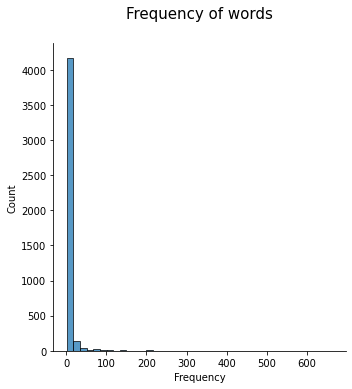

In [ ]:
plt.figure(figsize=(20,10))
sns.displot(data=df_word_freq,bins=40, x="Frequency");
plt.title('Frequency of words', fontsize = 15, pad = 25)

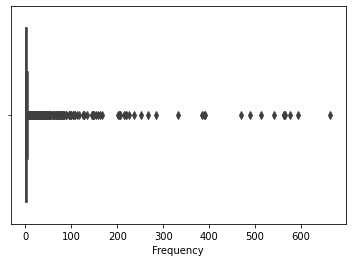

In [ ]:
sns.boxplot(data=df_word_freq,x='Frequency');

In [ ]:
df_word_freq['Frequency'].describe()

count    4448.000000
mean        7.390737
std        34.434174
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max       664.000000
Name: Frequency, dtype: float64

In [ ]:
sorted_freq=df_word_freq.sort_values(by='Frequency',ascending=False)

In [ ]:
df1=sorted_freq[0:40]

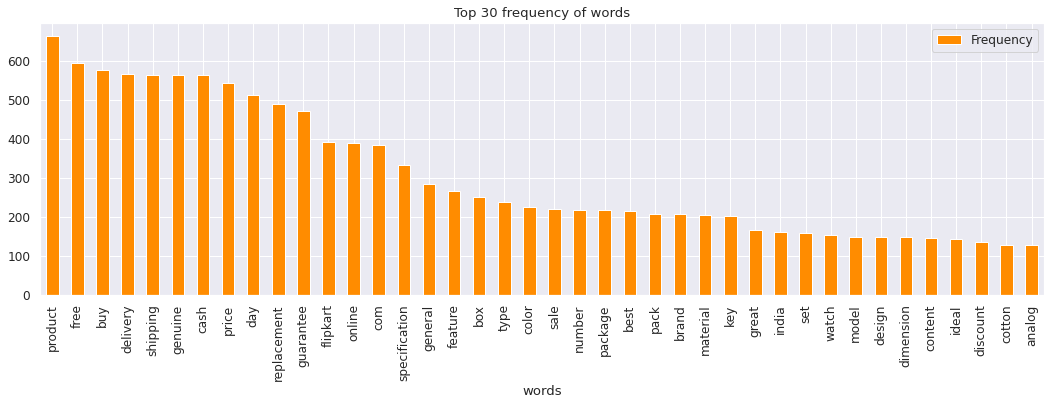

In [ ]:

sns.set(font_scale=1.1)
df1.plot(kind='bar',x='words',y='Frequency',title='Top 30 frequency of words',figsize=(18,5) ,color="darkorange")

In [ ]:
df2=sorted_freq[-41:-1]

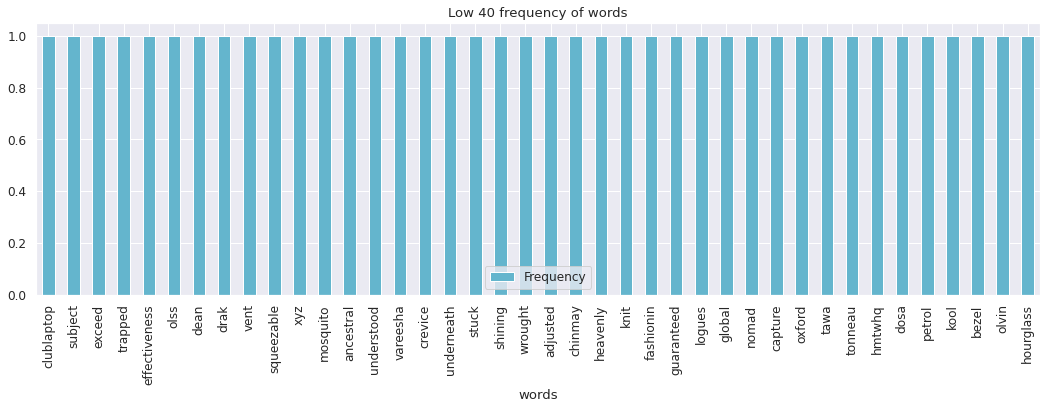

In [ ]:
df2.plot(kind='bar',x='words',y='Frequency', color="c",figsize=(18,5),title='Low 40 frequency of words')

In [ ]:
len(sorted_freq)

4448

### **word cloud**

Word clouds are fun to use as a visual aid with blog posts to underscore the keywords on which you're focusing.

https://medium.com/@harinisureshla/wordclouds-basics-of-nlp-5b60be226414

In [39]:
from wordcloud import WordCloud, STOPWORDS 

In [33]:
data['category'].unique()

array(['Home', 'Baby', 'Watches', 'Decor', 'Kitchen', 'Beauty',
       'Computers'], dtype=object)

In [34]:
df_home= data.loc[data['category']== 'Home']

In [35]:
df_home.head(2)

image  \
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
3  d4684dcdc759dd9cdf41504698d737d8.jpg   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   

                               product_category_tree  \
0  ["Home Furnishing >> Curtains & Accessories >>...   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...   

                                         description category  \
0  Key Features of Elegance Polyester Multicolor ...     Home   
3  Key Features of SANTOSH ROYAL FASHION Cotton P...     Home   

             category_1                                  description_clean  \
0  Curtains&Accessories  key features of elegance polyester multicolor ...   
3              BedLinen  key features of santosh royal fashion cotton p...   

                                          name_clean  \
0  elegance polyester multicolor abstract eyelet ...   
3  santosh royal fashion cotton printed king size...   

                               description_tokenized  \
0  [key, features, of, elegance, polyester, multi...   
3  [key, features, of, santosh, royal, fashion, c...   

                                      name_tokenized  \
0  [elegance, polyester, multicolor, abstract, ey...   
3  [santosh, royal, fashion, cotton, printed, kin...   

                                description_stopword  \
0  [key, features, elegance, polyester, multicolo...   
3  [key, features, santosh, royal, fashion, cotto...   

                                       name_stopword  \
0  [elegance, polyester, multicolor, abstract, ey...   
3  [santosh, royal, fashion, cotton, printed, kin...   

                                   description_lemma  \
0  [key, feature, elegance, polyester, multicolor...   
3  [key, feature, santosh, royal, fashion, cotton...   

                                          name_lemma  \
0  [elegance, polyester, multicolor, abstract, ey...   
3  [santosh, royal, fashion, cotton, printed, kin...   

                             description_lemma_short  \
0  [key, feature, elegance, polyester, multicolor...   
3  [key, feature, santosh, royal, fashion, cotton...   

                                    name_lemma_short  
0  [elegance, polyester, multicolor, abstract, ey...  
3  [santosh, royal, fashion, cotton, printed, kin...

In [36]:
df_home['category_1'].unique()

array(['Curtains&Accessories', 'BedLinen', 'LivingRoomFurnishing',
       'BathLinen', 'JMDHomeFurnishing', "Kripa'sHomeFurnishing",
       'Kitchen&DiningLinen', 'Cushions,Pillows&Covers', 'Living',
       'TidyHomeFurnishing', 'Living]', 'FloorCoverings'], dtype=object)

In [49]:
comment_words = '' 
stopwords = set(STOPWORDS)

for val in df_home['category_1']: 
      
    val = str(val) 
    tokens = val.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

wordcloud_1 = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)

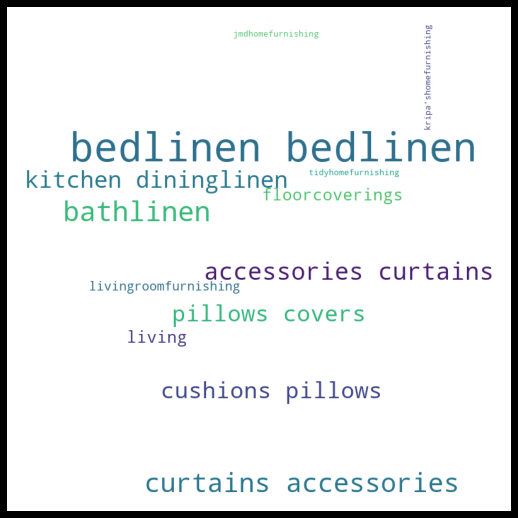

In [50]:
plt.figure(figsize = (7, 7), facecolor = 'black', edgecolor='blue') 
plt.imshow(wordcloud_1) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [51]:
df_Baby= data.loc[data['category']== 'Baby']

In [ ]:
df_Baby['category_1'].unique()

array(['BabyBath&Skin', 'InfantWear', 'Feeding&Nursing', 'BabyBedding',
       'Furniture&Furnishings', 'BabyGrooming', 'Diapering&PottyTraining',
       'Strollers&ActivityGear', 'Baby&KidsGifts'], dtype=object)

In [52]:
comment_words_2 = '' 
stopwords = set(STOPWORDS)

for val in df_Baby['category_1']:  
    val = str(val) 
    tokens = val.split() 
      
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words_2 += " ".join(tokens)+" "

wordcloud_2 = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)

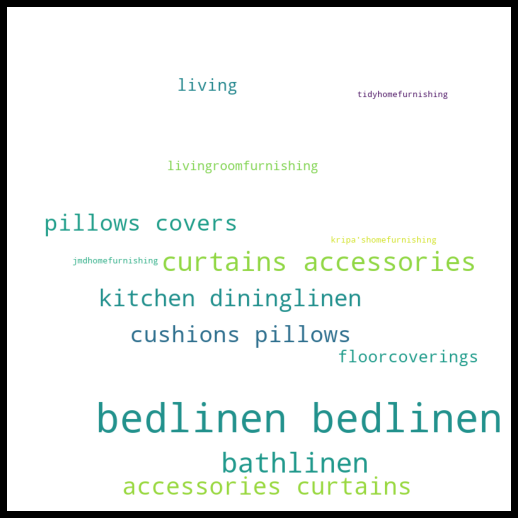

In [53]:
plt.figure(figsize = (7, 7), facecolor = 'black', edgecolor='blue') 
plt.imshow(wordcloud_2) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [54]:
df_Watches= data.loc[data['category']== 'Watches']

In [ ]:
df_Watches['category_1'].unique()

array(['WristWatches', 'Clocks'], dtype=object)

In [58]:
comment_words_3 = '' 
stopwords = set(STOPWORDS)

for val in df_Watches['category_1']: 
      
    val = str(val) 
  
    tokens = val.split() 
      
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "


wordcloud_3 = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)

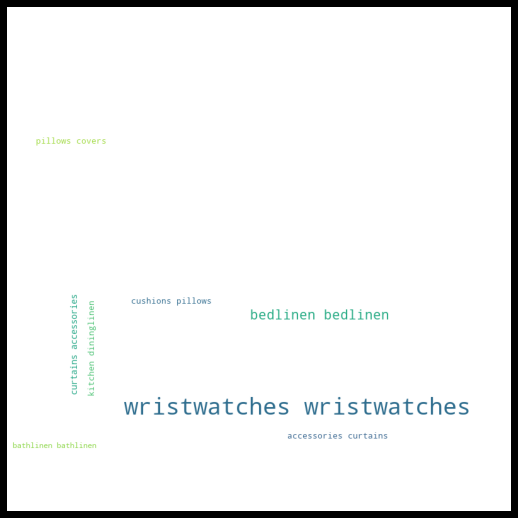

In [59]:
plt.figure(figsize = (7, 7), facecolor = 'black', edgecolor='blue') 
plt.imshow(wordcloud_3) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [60]:
df_Decor= data.loc[data['category']== 'Decor']

In [63]:
comment_words_4 = '' 
stopwords = set(STOPWORDS)

for val in df_Decor['category_1']:  
    val = str(val) 
    tokens = val.split() 
      
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words_4 += " ".join(tokens)+" "

wordcloud_4 = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)

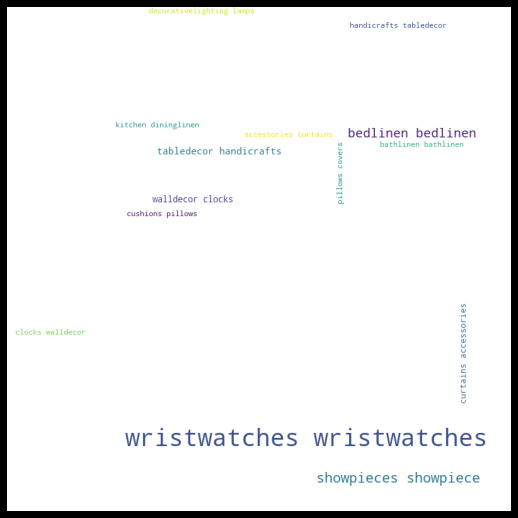

In [64]:
plt.figure(figsize = (7, 7), facecolor = 'black', edgecolor='blue') 
plt.imshow(wordcloud_4) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [67]:
df_Kitchen= data.loc[data['category']== 'Kitchen']

In [68]:
df_Kitchen['category_1'].unique()

array(['Tableware&Cutlery', 'Lighting', 'CoffeeMugs', 'Cookware',
       'Containers&Bottles', 'Consumables&Disposables', 'KitchenTools',
       'Bar&Glassware', 'PressureCookers&Pans', 'Housekeeping&Laundry',
       'Dinnerware&Crockery'], dtype=object)

In [69]:
comment_words_5 = '' 
stopwords = set(STOPWORDS)

for val in df_Kitchen['category_1']:  
    val = str(val) 
    tokens = val.split() 
      
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    comment_words_5 += " ".join(tokens)+" "

wordcloud_5 = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)

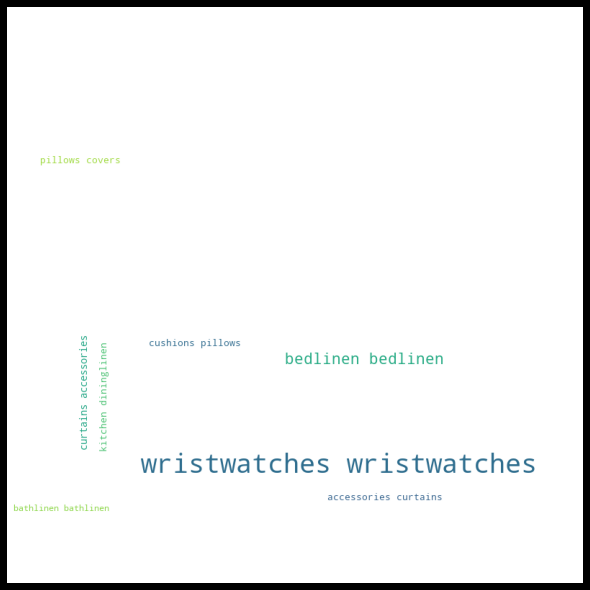

In [70]:
plt.figure(figsize = (7, 7), facecolor = 'black', edgecolor='blue') 
plt.imshow(wordcloud_3) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [71]:
df_Beauty= data.loc[data['category']== 'Beauty']

In [72]:
df_Beauty['category_1'].unique()

array(['HairCare', 'Makeup', 'CombosandKits', 'HealthCare',
       'BodyandSkinCare', 'Fragrances', "Women'sHygiene", 'BathandSpa',
       'EyeCare', "Men'sGrooming", 'BeautyAccessories'], dtype=object)

In [73]:
comment_words_6 = '' 
stopwords = set(STOPWORDS)

for val in df_Beauty['category_1']:    
    val = str(val) 
    tokens = val.split() 
      
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words_6 += " ".join(tokens)+" "

wordcloud_6 = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)

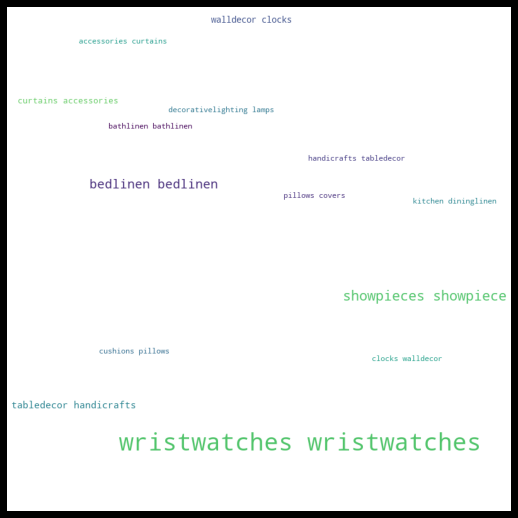

In [74]:
plt.figure(figsize = (7, 7), facecolor = 'black', edgecolor='blue') 
plt.imshow(wordcloud_6) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [78]:
df_Computers= data.loc[data['category']== 'Computers']

In [79]:
df_Computers['category_1'].unique()

array(['NetworkComponents', 'TabletAccessories', 'LaptopAccessories',
       'Software', 'ComputerPeripherals', 'Storage', 'Laptops',
       'ComputerComponents'], dtype=object)

In [81]:
comment_words_7 = '' 
stopwords = set(STOPWORDS)

for val in df_Computers['category_1']:  
    val = str(val) 
    tokens = val.split() 
      
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

wordcloud_7 = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)

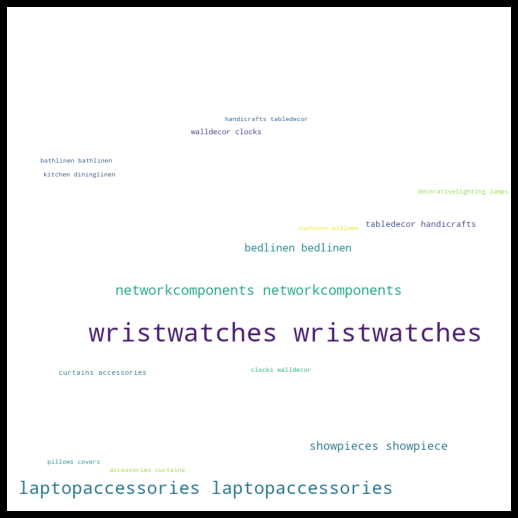

In [82]:
plt.figure(figsize = (7, 7), facecolor = 'black', edgecolor='blue') 
plt.imshow(wordcloud_7) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [ ]:
 'Watches', 'Decor', 'Kitchen', 'Beauty',
       'Computers']

(-0.5, 399.5, 199.5, -0.5)

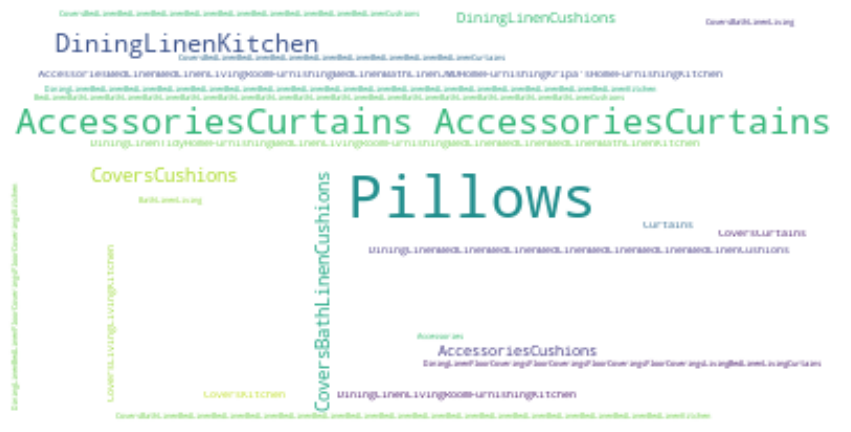

In [ ]:

corpus=df_home['category_1']
wordcloud = WordCloud(stopwords=stopwords, background_color="white")
text="".join(map(str, corpus)) 
wordcloud.generate(text)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis('off')

In [ ]:
body_corpus = ' '.join(data['category']==['Home'])

body_wordcloud = WordCloud(background_color = 'white',
                           height = 2000, width = 4000).generate(body_corpus)
plt.figure(figsize = (16,8))
plt.imshow(body_wordcloud)
plt.axis('off')
plt.show()

ValueError: ignored

In [ ]:
stopwords = set(df1)
corpus=data['description_lemma']
wordcloud = WordCloud(stopwords=stopwords, background_color="white")
text="".join(map(str, corpus)) 
wordcloud.generate(text)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis('off')

In [ ]:
stopwords = set(df1)
corpus=data['category']
wordcloud = WordCloud(stopwords=stopwords, background_color="white")
text="".join(map(str, corpus)) 
wordcloud.generate(text)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis('off')

In [ ]:
data['category_1'].unique()

**Filtering dataset**

In [ ]:
data.head(2)

In [ ]:
text_data= data.filter(items=['image','product_name','category','category_1','description_lemma_short','name_lemma_short'])

In [ ]:
text_data['descrip_with_once_rep']= text_data['description_lemma_short']

**Removing** all the words which are repeated once! 

In [ ]:
print(len(df_word_freq['Frequency'].index[df_word_freq['Frequency']==1]),"words are repeated once")

In [ ]:
rem_list = list(df_word_freq['Frequency'].index[df_word_freq['Frequency']==1])
df_word_freq['words'][rem_list].values

In [ ]:
# remove all the words which are repeated once
text_data['descrip_without_once_rep'] = text_data['descrip_with_once_rep'].apply(lambda x: [i for i in x if i not in df_word_freq['words'][rem_list].values])

In [ ]:
word_size(text_data,'descrip_without_once_rep')

In [ ]:
text_data['descrip_without_once_rep']

**Analyse exploratoire apres suppression**

In [ ]:
stats, freq = dict(), dict()
for k, v in text_data['descrip_without_once_rep'].iteritems():
  freq[k] = fq = nltk.FreqDist(v)
  stats[k] = {'total': len(v)} 


freq_totale = nltk.Counter()
for k, v in text_data['descrip_without_once_rep'].iteritems():
    freq_totale += freq[k]

In [ ]:
freq_totale.keys()

In [ ]:
df=pd.DataFrame({'words':freq_totale.keys(),'Frequency':freq_totale.values()})

In [ ]:
df

words  Frequency
0             key        224
1         feature        404
2        elegance         11
3       polyester         68
4      multicolor        167
...           ...        ...
2020          gum         10
2021      residue         10
2022  suitablefor         11
2023        patta          2
2024     uberlyfe          4

[2025 rows x 2 columns]

Text(0.5, 1.0, 'word frequency after cleaning')

<Figure size 1440x720 with 0 Axes>

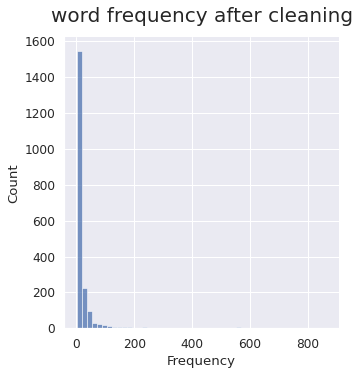

In [ ]:
plt.figure(figsize=(20,10))
sns.displot(data=df,bins=50, x="Frequency");
plt.title('word frequency after cleaning', fontsize = 20, pad = 15)

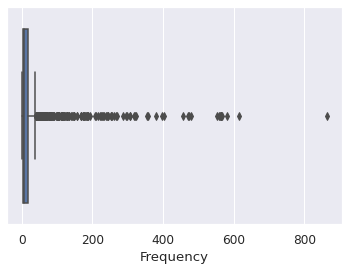

In [ ]:
sns.boxplot(data=df,x='Frequency');

In [ ]:
df['Frequency'].describe()

count    2025.000000
mean       23.848395
std        61.704008
min         2.000000
25%         4.000000
50%         7.000000
75%        18.000000
max       864.000000
Name: Frequency, dtype: float64

### **Bigram** frequency

https://towardsdatascience.com/text-analysis-basics-in-python-443282942ec5

https://www.kaggle.com/vpkprasanna/basic-text-cleaning-wordcloud-and-n-gram-analysis

In [ ]:
def baigram_clean(text):
  """
  A simple function to clean up the data. All the words that
  are not designated as a stop word is then lemmatized after
  encoding and basic regex parsing are performed.
  """
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english')
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [ ]:
bigram = baigram_clean(''.join(str(data['description_lemma'].tolist())))

In [ ]:
description_bigrams_series = (pd.Series(nltk.ngrams(bigram, 2)).value_counts())[:20]

Text(0.5, 0, '# of Occurances')

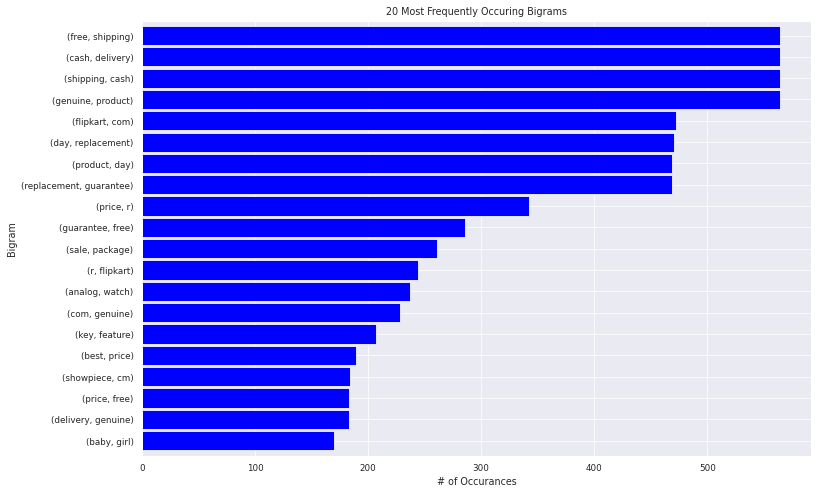

In [ ]:
description_bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

In [ ]:
description_bigrams_series

(free, shipping)            564
(cash, delivery)            564
(shipping, cash)            564
(genuine, product)          564
(flipkart, com)             472
(day, replacement)          471
(product, day)              469
(replacement, guarantee)    469
(price, r)                  342
(guarantee, free)           286
(sale, package)             261
(r, flipkart)               244
(analog, watch)             237
(com, genuine)              228
(key, feature)              207
(best, price)               189
(showpiece, cm)             184
(delivery, genuine)         183
(price, free)               183
(baby, girl)                170
dtype: int64

## **Bag of words**

The bag-of-words model is a way of representing text data when modeling text with machine learning algorithms.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
corpus_1=text_data['descrip_with_once_rep'].apply(lambda x: ','.join(x))
corpus_1

0       key,feature,elegance,polyester,multicolor,abst...
1       specification,sathiyas,cotton,bath,towel,bath,...
2       key,feature,eurospa,cotton,terry,face,towel,se...
3       key,feature,santosh,royal,fashion,cotton,print...
4       key,feature,jaipur,print,cotton,floral,king,si...
                              ...                        
1045    oren,empower,extra,large,self,adhesive,sticker...
1046    wallmantra,large,vinyl,sticker,sticker,pack,pr...
1047    buy,uberlyfe,extra,large,pigmented,polyvinyl,f...
1048    buy,wallmantra,medium,vinyl,sticker,sticker,on...
1049    buy,uberlyfe,large,vinyl,sticker,online,uberly...
Name: descrip_with_once_rep, Length: 1050, dtype: object

In [ ]:
corpus_2=text_data['descrip_without_once_rep'].apply(lambda x: ','.join(x))
corpus_2

0       key,feature,elegance,polyester,multicolor,abst...
1       specification,cotton,bath,towel,bath,towel,red...
2       key,feature,cotton,terry,face,towel,set,size,s...
3       key,feature,santosh,royal,fashion,cotton,print...
4       key,feature,jaipur,print,cotton,floral,king,si...
                              ...                        
1045    empower,extra,large,self,adhesive,sticker,pack...
1046    wallmantra,large,vinyl,sticker,sticker,pack,pr...
1047    buy,uberlyfe,extra,large,pigmented,imported,st...
1048    buy,wallmantra,medium,vinyl,sticker,sticker,on...
1049    buy,uberlyfe,large,vinyl,sticker,online,uberly...
Name: descrip_without_once_rep, Length: 1050, dtype: object

In [ ]:
vectorizer = CountVectorizer(ngram_range=(1,1),analyzer = "word")
X = vectorizer.fit_transform(corpus_2)

In [ ]:
features_names=vectorizer.get_feature_names()
dense=X.todense()
denselist=dense.tolist()
#comptage_mots=pd.DataFrame(denselist,columns=features_names)
comptage_mots=pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())
comptage_mots.head()

aapno  ability  able  abode  absorbency  absorbent  abstract  accent  \
0      0        0     0      0           0          0         4       0   
1      0        0     0      0           0          0         0       0   
2      0        0     0      0           1          0         0       0   
3      0        0     0      0           0          0         0       0   
4      0        0     0      0           0          0         0       0   

   access  accessory  accident  accidental  according  across  act  actual  \
0       0          0         0           0          0       0    0       0   
1       0          0         0           0          0       0    0       0   
2       0          0         0           0          0       0    0       0   
3       0          0         0           0          0       0    0       0   
4       0          0         0           0          0       0    0       0   

   adapter  adaptor  add  addition  additional  adhesive  adidas  adjustable  \
0        0        0    0         0           0         0       0           0   
1        0        0    0         0           0         0       0           0   
2        0        0    0         0           0         0       0           0   
3        0        0    0         0           0         0       0           0   
4        0        0    0         0           0         0       0           0   

   admired  adorable  adorn  adsl  advice  aero  affect  affordable  age  aid  \
0        0         0      0     0       0     0       0           0    0    0   
1        0         0      0     0       0     0       0           0    0    0   
2        0         0      0     0       0     0       0           0    0    0   
3        0         0      0     0       0     0       0           0    0    0   
4        0         0      0     0       0     0       0           0    0    0   

   air  akup  alarm  alfajr  aline  allin  allow  allowed  allowing  allows  \
0    0     0      0       0      0      0      0        0         0       0   
1    0     0      0       0      0      0      0        0         0       0   
2    0     0      0       0      0      0      0        0         0       0   
3    0     0      0       0      0      0      0        0         0       0   
4    0     0      0       0      0      0      0        0         0       0   

   alloy  alluring  almond  aloevera  along  also  alternative  aluminium  \
0      0         0       0         0      0     0            0          0   
1      0         0       0         0      0     0            0          0   
2      0         0       0         0      0     0            0          0   
3      0         0       0         0      0     0            0          0   
4      0         0       0         0      0     0            0          0   

   always  amazed  amazing  ambience  amount  analog  analogdigital  andre  \
0       0       0        0         0       1       0              0      0   
1       0       0        0         0       0       0              0      0   
2       0       0        0         0       0       0              0      0   
3       0       0        0         0       0       0              0      0   
4       0       0        0         0       0       0              0      0   

   android  angel  animal  anna  anodised  another  ant  anti  antiaging  \
0        0      0       0     0         0        0    1     1          0   
1        0      0       0     0         0        0    0     0          0   
2        0      0       0     0         0        0    0     0          0   
3        0      0       0     0         0        0    0     0          0   
4        0      0       0     0         0        0    0     0          0   

   antibacterial  antidepressant  antique  antiqueshop  antiseptic  anymore  \
0              0               0        0            0           0        0   
1              0               0        0            0           0        0   
2             

In [ ]:
df=pd.DataFrame({'Word frequancy': comptage_mots.max().sort_values(ascending=False).index,'Total':comptage_mots.max().sort_values(ascending=False).values})

In [ ]:
df

Word frequancy  Total
0            laptop     21
1           product     21
2              bowl     21
3           blanket     19
4              skin     18
...             ...    ...
2020      floralina      1
2021       midiknee      1
2022           mild      1
2023         milton      1
2024          zyxel      1

[2025 rows x 2 columns]

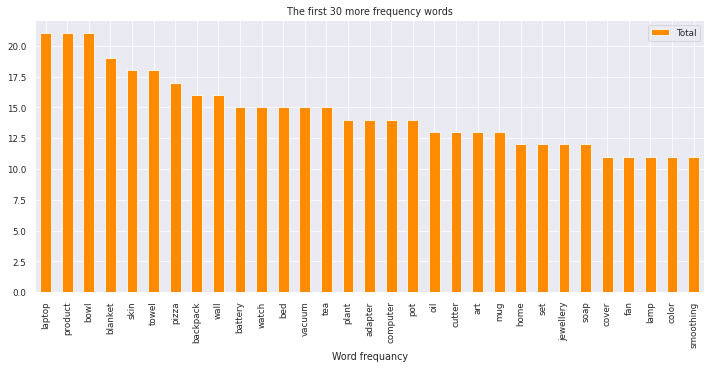

In [ ]:

df1=df.loc[0:30,['Word frequancy','Total']]

df1.plot(kind='bar',x='Word frequancy',y='Total', color="darkorange",title='The first 30 more frequency words',figsize=(12,5))


### **TF IDF**
Term frequency-inverse document frequency

Text vectorization algorithm namely TF-IDF vectorizer, which is a very popular approach for traditional machine learning algorithms can help in transforming text into vectors.
tf–idf can be successfully used for stop-words filtering in various subject fields, including text summarization and classification. One of the simplest ranking functions is computed by summing the tf–idf for each query term; many more sophisticated ranking functions are variants of this simple model.

TF-IDF is better than Count Vectorizers because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words. We can then remove the words that are less important for analysis, hence making the model building less complex by reducing the input dimensions

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vect=TfidfVectorizer (analyzer='word', stop_words= 'english',ngram_range=(1,2), max_df=0.65, min_df=5)
tfidf_mat_1=vect.fit_transform(corpus_2)

In [ ]:
features_names=vect.get_feature_names()
dense=tfidf_mat_1.todense()
denselist=dense.tolist()
words_freq_1=pd.DataFrame(denselist,columns=features_names)
words_freq_1.head(3)

absorbent  abstract  abstract double  abstract single  accessory  \
0        0.0  0.174234              0.0              0.0        0.0   
1        0.0  0.000000              0.0              0.0        0.0   
2        0.0  0.000000              0.0              0.0        0.0   

   accessory battery  actual  actual product  adapter  adapter assure  \
0                0.0     0.0             0.0      0.0             0.0   
1                0.0     0.0             0.0      0.0             0.0   
2                0.0     0.0             0.0      0.0             0.0   

   adapter charger  adapter conforms  adapter designed  adapter key  \
0              0.0               0.0               0.0          0.0   
1              0.0               0.0               0.0          0.0   
2              0.0               0.0               0.0          0.0   

   adapter laptop  adapter output  adapter pass  adapter pin  adapter power  \
0             0.0             0.0           0.0          0.0            0.0   
1             0.0             0.0           0.0          0.0            0.0   
2             0.0             0.0           0.0          0.0            0.0   

   adapter voltage  add  add kitchen  addition  additional  \
0              0.0  0.0          0.0       0.0         0.0   
1              0.0  0.0          0.0       0.0         0.0   
2              0.0  0.0          0.0       0.0         0.0   

   additional feature  additional style  additional trait  adidas  adjustable  \
0                 0.0               0.0               0.0     0.0         0.0   
1                 0.0               0.0               0.0     0.0         0.0   
2                 0.0               0.0               0.0     0.0         0.0   

   adorable  adorable fantastic  affordable  affordable mug  age  age group  \
0       0.0                 0.0         0.0             0.0  0.0        0.0   
1       0.0                 0.0         0.0             0.0  0.0        0.0   
2       0.0                 0.0         0.0             0.0  0.0        0.0   

   air  akup  akup ceramic  akup design  alarm  aline  aline dress  almond  \
0  0.0   0.0           0.0          0.0    0.0    0.0          0.0     0.0   
1  0.0   0.0           0.0          0.0    0.0    0.0          0.0     0.0   
2  0.0   0.0           0.0          0.0    0.0    0.0          0.0     0.0   

   almond honey  aloevera  aluminium  aluminium water  amazing  analog  \
0           0.0       0.0        0.0              0.0      0.0     0.0   
1           0.0       0.0        0.0              0.0      0.0     0.0   
2           0.0       0.0        0.0              0.0      0.0     0.0   

   analog style  analog watch  andre  android  animal  anna  anna andre  \
0           0.0           0.0    0.0      0.0     0.0   0.0         0.0   
1           0.0           0.0    0.0      0.0     0.0   0.0         0.0   
2           0.0           0.0    0.0      0.0     0.0   0.0         0.0   

   antique  apparel  apparel huge    appeal  appearance  apple  application  \
0      0.0      0.0           0.0  0.061684         0.0    0.0          0.0   
1      0.0      0.0           0.0  0.000000         0.0    0.0          0.0   
2      0.0      0.0           0.0  0.000000         0.0    0.0          0.0   

   applied  apply  apply scratch  area  aroma  aroma comfort  art  artificial  \
0      0.0    0.0            0.0   0.0    0.0            0.0  0.0         0.0   
1      0.0    0.0            0.0   0.0    0.0            0.0  0.0         0.0   
2      0.0    0.0            0.0   0.0    0.0            0.0  0.0         0.0   

   artisan  artist  artistic  assorted  assure  assure select  assured  \
0      0.0     0.0       0.0  0.000000     0.0            0.0      0.0   
1      0.0     0.0       0.0  0.000000     0.0            0.0      0.0   
2      0.0     0.0       0.0  0.205771     0.0            0.0      0.0   

   assured quality  asus  attitude  attitude aluminium  attractive  \
0           

In [ ]:
words_freq_1.shape

(1050, 1955)

In [ ]:
words_freq_1.shape #65%

(1050, 15327)

In [ ]:
vect=TfidfVectorizer (analyzer='word', stop_words= 'english',ngram_range=(1,1))
tfidf_mat_2=vect.fit_transform(corpus_2)

In [ ]:
features_names=vect.get_feature_names()
dense=tfidf_mat_2.todense()
denselist=dense.tolist()
words_freq=pd.DataFrame(denselist,columns=features_names)
words_freq.head(3)

aapno  ability  able  abode  absorbency  absorbent  abstract  accent  \
0    0.0      0.0   0.0    0.0    0.000000        0.0  0.178226     0.0   
1    0.0      0.0   0.0    0.0    0.000000        0.0  0.000000     0.0   
2    0.0      0.0   0.0    0.0    0.075584        0.0  0.000000     0.0   

   access  accessory  accident  accidental  according  act  actual  adapter  \
0     0.0        0.0       0.0         0.0        0.0  0.0     0.0      0.0   
1     0.0        0.0       0.0         0.0        0.0  0.0     0.0      0.0   
2     0.0        0.0       0.0         0.0        0.0  0.0     0.0      0.0   

   adaptor  add  addition  additional  adhesive  adidas  adjustable  admired  \
0      0.0  0.0       0.0         0.0       0.0     0.0         0.0      0.0   
1      0.0  0.0       0.0         0.0       0.0     0.0         0.0      0.0   
2      0.0  0.0       0.0         0.0       0.0     0.0         0.0      0.0   

   adorable  adorn  adsl  advice  aero  affect  affordable  age  aid  air  \
0       0.0    0.0   0.0     0.0   0.0     0.0         0.0  0.0  0.0  0.0   
1       0.0    0.0   0.0     0.0   0.0     0.0         0.0  0.0  0.0  0.0   
2       0.0    0.0   0.0     0.0   0.0     0.0         0.0  0.0  0.0  0.0   

   akup  alarm  alfajr  aline  allin  allow  allowed  allowing  allows  alloy  \
0   0.0    0.0     0.0    0.0    0.0    0.0      0.0       0.0     0.0    0.0   
1   0.0    0.0     0.0    0.0    0.0    0.0      0.0       0.0     0.0    0.0   
2   0.0    0.0     0.0    0.0    0.0    0.0      0.0       0.0     0.0    0.0   

   alluring  almond  aloevera  alternative  aluminium  amazed  amazing  \
0       0.0     0.0       0.0          0.0        0.0     0.0      0.0   
1       0.0     0.0       0.0          0.0        0.0     0.0      0.0   
2       0.0     0.0       0.0          0.0        0.0     0.0      0.0   

   ambience  analog  analogdigital  andre  android  angel  animal  anna  \
0       0.0     0.0            0.0    0.0      0.0    0.0     0.0   0.0   
1       0.0     0.0            0.0    0.0      0.0    0.0     0.0   0.0   
2       0.0     0.0            0.0    0.0      0.0    0.0     0.0   0.0   

   anodised       ant      anti  antiaging  antibacterial  antidepressant  \
0       0.0  0.070537  0.068142        0.0            0.0             0.0   
1       0.0  0.000000  0.000000        0.0            0.0             0.0   
2       0.0  0.000000  0.000000        0.0            0.0             0.0   

   antique  antiqueshop  antiseptic  anymore     apart  app  apparel  \
0      0.0          0.0         0.0      0.0  0.073626  0.0      0.0   
1      0.0          0.0         0.0      0.0  0.000000  0.0      0.0   
2      0.0          0.0         0.0      0.0  0.000000  0.0      0.0   

     appeal  appealing  appearance  appears  apple  application  applied  \
0  0.063097        0.0         0.0      0.0    0.0          0.0      0.0   
1  0.000000        0.0         0.0      0.0    0.0          0.0      0.0   
2  0.000000        0.0         0.0      0.0    0.0          0.0      0.0   

   apply  approach  approx  arabian  arb  archies  area  aroma  art  artifact  \
0    0.0       0.0     0.0      0.0  0.0      0.0   0.0    0.0  0.0       0.0   
1    0.0       0.0     0.0      0.0  0.0      0.0   0.0    0.0  0.0       0.0   
2    0.0       0.0     0.0      0.0  0.0      0.0   0.0    0.0  0.0       0.0   

   artificial  artisan  artist  artistic  artpiece  artwork  asia  aspect  \
0         0.0      0.0     0.0       0.0       0.0      0.0   0.0     0.0   
1         0.0      0.0     0.0       0.0       0.0      0.0   0.0     0.0   
2         0.0      0.0     0.0       0.0       0.0      0.0   0.0     0.0   

   assembled  assembly  assorted  assure  assured  astringent  asus  \
0        0.0       0.0  0.000000     0.0      0.0         0.0   0.0   
1        0.0       0.0  0.000000     0.0      0.0         0.0   0.0   
2        0.0       0.0  0.203836     0.0      0.0         0.0   0.0   

   attenti

In [ ]:
words_freq.shape

(1050, 1943)

In [ ]:
df=pd.DataFrame({'word_freq': words_freq.max().sort_values(ascending=False).index,'Total':words_freq.max().sort_values(ascending=False).values})


In [ ]:
df

word_freq     Total
0         shadow  0.934044
1         cooker  0.907424
2           true  0.900339
3         kadhai  0.835107
4            cow  0.831092
...          ...       ...
1938  compliance  0.044737
1939   deviation  0.044737
1940  requirment  0.044737
1941      assure  0.044737
1942    volatege  0.044737

[1943 rows x 2 columns]

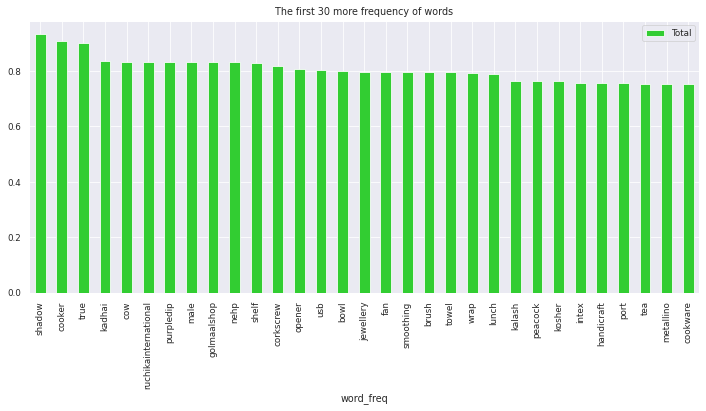

In [ ]:
df1=df.loc[0:30,['word_freq','Total']]#les 20mots les plus frequents 
df1.plot(kind='bar',x='word_freq',y='Total', color="limegreen",title='The first 30 more frequency of words',figsize=(12,5))

In [ ]:
words_freq.describe()

aapno      ability         able        abode   absorbency  \
count  1050.000000  1050.000000  1050.000000  1050.000000  1050.000000   
mean      0.001325     0.000313     0.000762     0.000383     0.000191   
std       0.025019     0.008419     0.012347     0.008964     0.004518   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       0.540935     0.265486     0.205913     0.242478     0.125438   

         absorbent     abstract       accent       access    accessory  \
count  1050.000000  1050.000000  1050.000000  1050.000000  1050.000000   
mean      0.001129     0.011520     0.000372     0.000146     0.001855   
std       0.019162     0.062111     0.008695     0.003750     0.017459   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       0.444728     0.619200     0.234156     0.115539     0.346999   

          accident   accidental    according          act       actual  \
count  1050.000000  1050.000000  1050.000000  1050.000000  1050.000000   
mean      0.000126     0.000133     0.000223     0.000352     0.001258   
std       0.002900     0.003355     0.004323     0.007628     0.012267   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       0.072510     0.102003     0.103776     0.224335     0.273480   

           adapter      adaptor          add     addition   additional  \
count  1050.000000  1050.000000  1050.000000  1050.000000  1050.000000   
mean      0.005827     0.001157     0.003931     0.000759     0.005618   
std       0.050388     0.021129     0.022903     0.010040     0.021330   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       0.617882     0.566767     0.226397     0.206120     0.191327   

          adhesive       adidas   adjustable      admired     adorable  \
count  1050.000000  1050.000000  1050.000000  1050.000000  1050.000000   
mean      0.001092     0.002149     0.000939     0.000250     0.002259   
std       0.019651     0.031906     0.012866     0.006157     0.019098   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       0.375173     0.647084     0.260574     0.182865     0.170988   

             adorn         adsl       advice         aero       affect  \
count  1050.000000  1050.000000  1050.000000  1050.000000  1050.000000   
mean      0.000787     0.000935     0.000195     0.001304     0.000210   
std       0.013281     0.021424     0.003702     0.024387     0.004817   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       0.269760     0.510152     0.084792     0.466455     0.110476   

        aff

### **Word2vec**

Each word's **TF-IDF** relevance is a normalized data format that also adds up to one. ... The main difference is that **Word2vec** produces one vector per word, whereas BoW produces one number (a wordcount). Word2vec is great for digging into documents and identifying content and subsets of content.

In [ ]:
df_tfidfvect_total = pd.concat([text_data, words_freq], axis=1)
df_tfidfvect_total.head(2)

image  \
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1  7b72c92c2f6c40268628ec5f14c6d590.jpg   

                                        product_name  category  \
0  Elegance Polyester Multicolor Abstract Eyelet ...      Home   
1                         Sathiyas Cotton Bath Towel      Baby   

             category_1                            description_lemma_short  \
0  Curtains&Accessories  [key, feature, elegance, polyester, multicolor...   
1         BabyBath&Skin  [specification, sathiyas, cotton, bath, towel,...   

                                    name_lemma_short  \
0  [elegance, polyester, multicolor, abstract, ey...   
1                    [sathiyas, cotton, bath, towel]   

                                   description_final  aapno  ability  able  \
0  [key, feature, elegance, polyester, multicolor...    0.0      0.0   0.0   
1  [specification, cotton, bath, towel, bath, tow...    0.0      0.0   0.0   

   abode  absorbency  absorbent  abstract  accent  access  accessory  \
0    0.0         0.0        0.0  0.178226     0.0     0.0        0.0   
1    0.0         0.0        0.0  0.000000     0.0     0.0        0.0   

   accident  accidental  according  act  actual  adapter  adaptor  add  \
0       0.0         0.0        0.0  0.0     0.0      0.0      0.0  0.0   
1       0.0         0.0        0.0  0.0     0.0      0.0      0.0  0.0   

   addition  additional  adhesive  adidas  adjustable  admired  adorable  \
0       0.0         0.0       0.0     0.0         0.0      0.0       0.0   
1       0.0         0.0       0.0     0.0         0.0      0.0       0.0   

   adorn  adsl  advice  aero  affect  affordable  age  aid  air  akup  alarm  \
0    0.0   0.0     0.0   0.0     0.0         0.0  0.0  0.0  0.0   0.0    0.0   
1    0.0   0.0     0.0   0.0     0.0         0.0  0.0  0.0  0.0   0.0    0.0   

   alfajr  aline  allin  allow  allowed  allowing  allows  alloy  alluring  \
0     0.0    0.0    0.0    0.0      0.0       0.0     0.0    0.0       0.0   
1     0.0    0.0    0.0    0.0      0.0       0.0     0.0    0.0       0.0   

   almond  aloevera  alternative  aluminium  amazed  amazing  ambience  \
0     0.0       0.0          0.0        0.0     0.0      0.0       0.0   
1     0.0       0.0          0.0        0.0     0.0      0.0       0.0   

   analog  analogdigital  andre  android  angel  animal  anna  anodised  \
0     0.0            0.0    0.0      0.0    0.0     0.0   0.0       0.0   
1     0.0            0.0    0.0      0.0    0.0     0.0   0.0       0.0   

        ant      anti  antiaging  antibacterial  antidepressant  antique  \
0  0.070537  0.068142        0.0            0.0             0.0      0.0   
1  0.000000  0.000000        0.0            0.0             0.0      0.0   

   antiqueshop  antiseptic  anymore     apart  app  apparel    appeal  \
0          0.0         0.0      0.0  0.073626  0.0      0.0  0.063097   
1          0.0         0.0      0.0  0.000000  0.0      0.0  0.000000   

   appealing  appearance  appears  apple  application  applied  apply  \
0        0.0         0.0      0.0    0.0          0.0      0.0    0.0   
1        0.0         0.0      0.0    0.0          0.0      0.0    0.0   

   approach  approx  arabian  arb  archies  area  aroma  art  artifact  \
0       0.0     0.0      0.0  0.0      0.0   0.0    0.0  0.0       0.0   
1       0.0     0.0      0.0  0.0      0.0   0.0    0.0  0.0       0.0   

   artificial  artisan  artist  artistic  artpiece  artwork  asia  aspect  \
0         0.0      0.0     0.0       0.0       0.0      0.0   0.0     0.0   
1         0.0      0.0     0.0       0.0       0.0      0.0   0.0     0.0   

   assembled  assembly  assorted  assure  assured  astringent  asus  \
0        0.0       0.0       0.0     0.0      0.0         0.0   0.0   
1        0.0       0.0       0.0     0.0      0.0         0.0   0.0   

   attention  attitude  attivo  attractive  audio  authentication  automatic  \
0   0.068142       0.0     0.0         0.0    0.0     

Making a **new file**

In [ ]:
# All the data in TFIDF with image & product_category 'df_tfidfvect_total'

from google.colab import drive
drive.mount('/content/drive')
df_tfidfvect_total.to_csv('df_tfidfvect_total.csv', index=False)
!cp new_df.csv /content/drive/My\ Drive/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
cp: cannot stat 'new_df.csv': No such file or directory


In [ ]:
# all words after TFIDF 'words_freq'
from google.colab import drive
drive.mount('/content/drive')
words_freq.to_csv('words_freq.csv', index=False)
!cp new_df.csv /content/drive/My\ Drive/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# our first dataset after cleaning 'text_data'
from google.colab import drive
drive.mount('/content/drive')
text_data.to_csv('text_data.csv', index=False)
!cp new_df.csv /content/drive/My\ Drive/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/bin/bash: -c: line 0: unexpected EOF while looking for matching `"'
/bin/bash: -c: line 1: syntax error: unexpected end of file


In [ ]:
%cd /content/drive/My\Drive/p6
!ls

df_tfidfvect = pd.read_csv('/content/drive/MyDrive/p6/words_freq.csv')

/content/drive/MyDrive/p6
'Classifier automatiquement des biens de consommation.ipynb'   image
 df_tfidfvect.csv					       new_df.csv
 df_tfidfvect_total.csv					       results.txt
 df_untokenize_description.csv				       text_data.csv
 flipkart_com-ecommerce_sample_1050.csv			       words_freq.csv


In [ ]:
df_tfidfvect.keys()

Index(['aapno', 'ability', 'able', 'abode', 'absorbency', 'absorbent',
       'abstract', 'accent', 'access', 'accessory',
       ...
       'yes', 'york', 'young', 'youth', 'youthful', 'yuva', 'zero', 'zipper',
       'zone', 'zyxel'],
      dtype='object', length=1943)

In [ ]:
df_tfidfvect.describe()

aapno      ability         able        abode   absorbency  \
count  1050.000000  1050.000000  1050.000000  1050.000000  1050.000000   
mean      0.001325     0.000313     0.000762     0.000383     0.000191   
std       0.025019     0.008419     0.012347     0.008964     0.004518   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       0.540935     0.265486     0.205913     0.242478     0.125438   

         absorbent     abstract       accent       access    accessory  \
count  1050.000000  1050.000000  1050.000000  1050.000000  1050.000000   
mean      0.001129     0.011520     0.000372     0.000146     0.001855   
std       0.019162     0.062111     0.008695     0.003750     0.017459   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       0.444728     0.619200     0.234156     0.115539     0.346999   

          accident   accidental    according          act       actual  \
count  1050.000000  1050.000000  1050.000000  1050.000000  1050.000000   
mean      0.000126     0.000133     0.000223     0.000352     0.001258   
std       0.002900     0.003355     0.004323     0.007628     0.012267   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       0.072510     0.102003     0.103776     0.224335     0.273480   

           adapter      adaptor          add     addition   additional  \
count  1050.000000  1050.000000  1050.000000  1050.000000  1050.000000   
mean      0.005827     0.001157     0.003931     0.000759     0.005618   
std       0.050388     0.021129     0.022903     0.010040     0.021330   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       0.617882     0.566767     0.226397     0.206120     0.191327   

          adhesive       adidas   adjustable      admired     adorable  \
count  1050.000000  1050.000000  1050.000000  1050.000000  1050.000000   
mean      0.001092     0.002149     0.000939     0.000250     0.002259   
std       0.019651     0.031906     0.012866     0.006157     0.019098   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       0.375173     0.647084     0.260574     0.182865     0.170988   

             adorn         adsl       advice         aero       affect  \
count  1050.000000  1050.000000  1050.000000  1050.000000  1050.000000   
mean      0.000787     0.000935     0.000195     0.001304     0.000210   
std       0.013281     0.021424     0.003702     0.024387     0.004817   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       0.269760     0.510152     0.084792     0.466455     0.110476   

        aff

In [ ]:
%cd /content/drive/My\Drive/p6
!ls

text_data = pd.read_csv('/content/drive/MyDrive/p6/text_data.csv')

/content/drive/MyDrive/p6
'Classifier automatiquement des biens de consommation.ipynb'   image
 df_tfidfvect.csv					       new_df.csv
 df_tfidfvect_total.csv					       results.txt
 df_untokenize_description.csv				       text_data.csv
 flipkart_com-ecommerce_sample_1050.csv			       words_freq.csv


### **PCA**

In [ ]:
data['concat']=data['descrip_without_once_rep']+' '+data['name_clean']
X = data['name_clean'].copy()
X2=data['name_fin'].copy()

tfidf_matrix_N,tf_matrix_N=BOVW_TF(data['name_clean'].copy(),n_gram=(1,2))
tfidf_matrix_NF,tf_matrix_NF=BOVW_TF(data['name_fin'].copy(),n_gram=(1,2))

tfidf_matrix_D,tf_matrix_D=BOVW_TF(data['descrip_without_once_rep'].copy(),n_gram=(1,1))
tfidf_matrix_DF,tf_matrix_DF=BOVW_TF(data['description_fin'].copy(),n_gram=(1,1))

In [ ]:
pip install umap-learn

     |████████████████████████████████| 86 kB 3.5 MB/s 
     |████████████████████████████████| 1.1 MB 54.6 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=7958dd4ab7e74f8f37e6d2ee38d501edbd0747fcf95739a9b581107991ef2cc5
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=38e0c9c9deb9d04acae0ccca3a26c3d4d8efd14efc209393cf1f41db5bccce34
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [ ]:
from sklearn.decomposition import SparsePCA
from umap import UMAP
from sklearn.manifold import TSNE



def plot_tsne_pca(matrix,title,labels):

# Dimensionality reduction using PCA,
     # reduce the tfidf matrix to just 2 features

    pca = PCA(n_components=2,
              random_state=5).fit_transform(matrix)
    tsne_pca = TSNE().fit_transform(PCA(n_components=3).fit_transform(matrix))
    tsne = TSNE(n_components=2,
              random_state=5).fit_transform(matrix)   
    #attaching the label to each 2D projection
    pca_data=np.vstack((pca.T,labels)).T
    pca_df=pd.DataFrame(pca_data,
                        columns=['pca-one','pca-two','category'])

    tsne_data=np.vstack((tsne.T,labels)).T
    tsne_df=pd.DataFrame(tsne_data,
                         columns=['tsne-one','tsne-two','category'])

    
    
    idx = np.random.choice(range(pca.shape[0]), 
                           size=500, replace=False)
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))


    sns.scatterplot(data=pca_df,
                    x="pca-one",
                    y="pca-two",
                    hue='category',
                    ax=ax[0])
    ax[0].set_title('PCA Cluster Plot'+' '+title)

    sns.scatterplot(data=tsne_df,
                    x="tsne-one",
                    y="tsne-two",
                    hue='category',
                    ax=ax[1])
    ax[1].set_title('TSNE Cluster Plot'+' '+title)

In [ ]:
plot_tsne_pca(tf_matrix_N.todense(),'BOW_Name_clean',data['category'])

NameError: ignored

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
X=df_tfidfvect.values

features=df_tfidfvect.columns
from sklearn import decomposition
n_comp=0.95
pca=decomposition.PCA(n_components=n_comp)
pca.fit(X)

PCA(n_components=0.95)

In [ ]:
# fonction qui trace le graphique des eboulis des valeurs propres
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(), c="red", marker='.')
    plt.xlabel("rank of the axis of inertia")
    plt.ylabel("percentage of inertia")
    plt.title("Eigenvalue decay")
    plt.show(block=False)

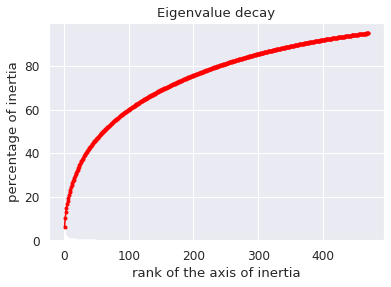

In [ ]:

display_scree_plot(pca)

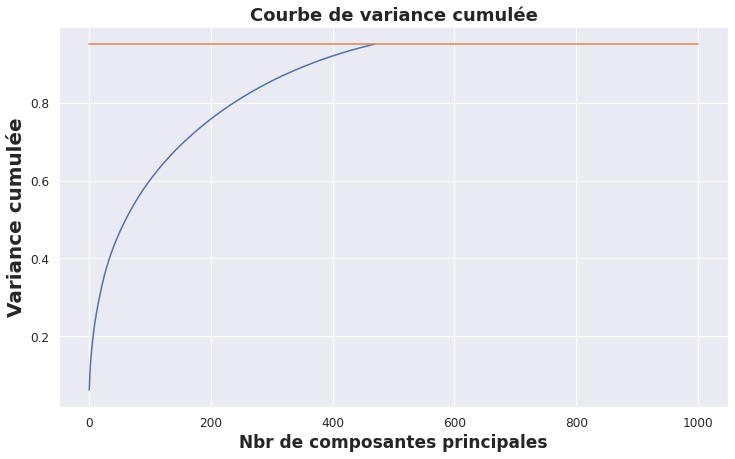

In [ ]:
plt.figure(figsize=(12, 7))
plt.ylabel("Variance cumulée", weight='bold', size=20)
plt.xlabel('Nbr de composantes principales', weight='bold', size=17)
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.title('Courbe de variance cumulée', size=18, weight='bold')
plt.plot([0,1000], [0.95, 0.95])

In [ ]:
c = 0
for i in pca.explained_variance_ratio_.cumsum():
    c += 1
    if(i > 0.95):
        print(
            'we need {} componants to explaine 95% of the variance of dataset'.format(c))
        break

we need 470 componants to explaine 95% of the variance of dataset


In [ ]:
a_show = pca.transform(df_tfidfvect)[:, 0]  # Component 1

b_show = pca.transform(df_tfidfvect)[:, 1]  # Component 2

X_pca = pca.transform(df_tfidfvect)[:, :c]

In [ ]:
text_data.keys()

Index(['image', 'product_name', 'category', 'category_1',
       'description_lemma_short', 'name_lemma_short', 'description_final',
       'descrip_with_once_rep', 'descrip_without_once_rep'],
      dtype='object')

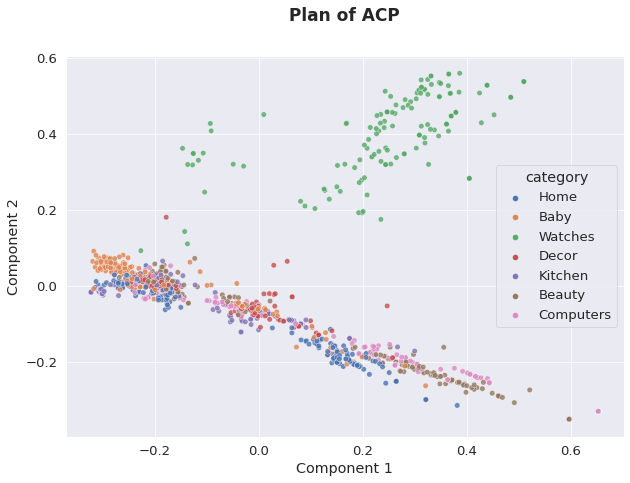

In [ ]:
sns.set_context("paper", font_scale=1.5)
plt.figure(figsize=(10, 7))

plt.title("Plan of ACP", fontsize = 17, pad = 35, fontweight = 'bold')
plt.xlabel("Component 1")
plt.ylabel("Component 2")
ax = plt.gca()

sns.scatterplot(
    x=pca.transform(df_tfidfvect)[:, 0],  # Component 1,
    y=pca.transform(df_tfidfvect)[:, 1],  # Component 2,
    hue=text_data['category'],
    alpha=0.8,
    s=30
)
sns.set_context("paper", font_scale=1)

### **T-SNE**

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components=2, init="pca")
X_pca=pca.transform(df_tfidfvect)
X_tsne = tsne.fit_transform(X_pca)

In [ ]:
df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = text_data["category"]
print(df_tsne.shape)

(1050, 3)


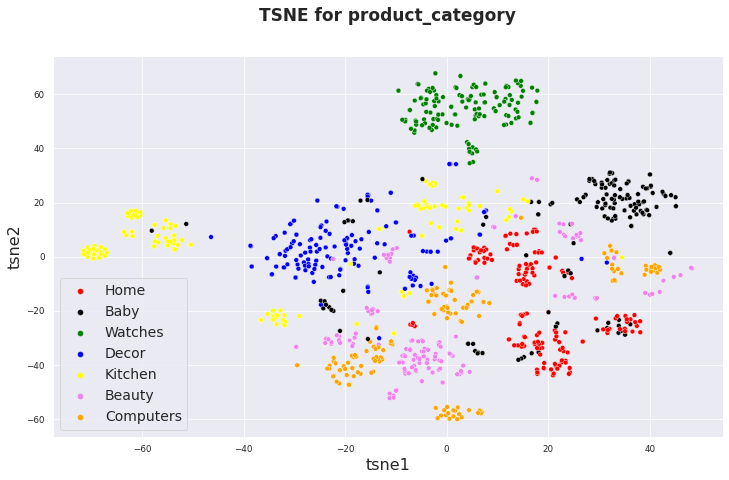

In [ ]:
plt.figure(figsize=(12,7))

sns.scatterplot(y='tsne2', x='tsne1', hue=data['category'],
                    palette=pal, data=df_tsne)
plt.title('TSNE for product_category', fontsize = 17, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 16)
plt.ylabel('tsne2', fontsize = 16)

plt.legend(prop={'size': 14}) 


## **Clustering**

In [ ]:
import pickle

In [ ]:
km = KMeans(n_clusters=7,
            random_state=10,
            init='k-means++')
model = km.fit(X_pca)

# save the model to disk
filename = 'clustering_model_kmeans_description.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
label = km.fit_predict(X_pca)

In [ ]:
mylist = model.labels_
mylist = list(set(mylist))
mylist

[0, 1, 2, 3, 4, 5, 6]

### crawl_timestamp

In [ ]:
data_con.dtypes

uniq_id                     object
crawl_timestamp             object
product_url                 object
product_name                object
product_category_tree       object
pid                         object
retail_price               float64
discounted_price           float64
image                       object
is_FK_Advantage_product       bool
description                 object
product_rating              object
overall_rating              object
brand                       object
product_specifications      object
dtype: object

In [ ]:
data_con['crawl_timestamp']

0       2016-04-30 03:22:56 +0000
1       2016-04-30 03:22:56 +0000
2       2016-04-30 03:22:56 +0000
3       2016-06-20 08:49:52 +0000
4       2016-06-20 08:49:52 +0000
                  ...            
1045    2015-12-01 10:15:43 +0000
1046    2015-12-01 10:15:43 +0000
1047    2015-12-01 10:15:43 +0000
1048    2015-12-01 10:15:43 +0000
1049    2015-12-01 10:15:43 +0000
Name: crawl_timestamp, Length: 1050, dtype: object

In [ ]:
data_con['crawl_timestamp'] = data_con['crawl_timestamp'].astype('datetime64')

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

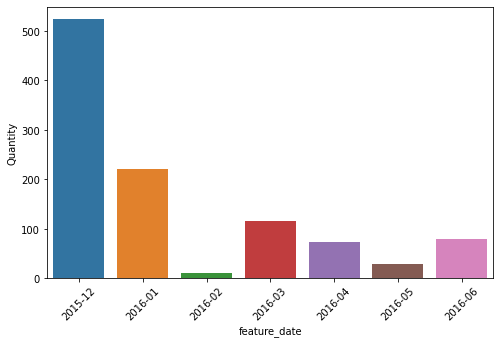

In [ ]:
df_tmp = pd.DataFrame(pd.DatetimeIndex(data_con['crawl_timestamp']).to_period('M'))
tmp = df_tmp['crawl_timestamp'].value_counts()

df_tmp = pd.DataFrame({ 'feature_date': tmp.index, 'Quantity': tmp.values })
df_tmp = df_tmp.sort_values(by='feature_date')

fig, ax = plt.subplots(figsize=(8, 5))
sns.set_color_codes("pastel")

s = sns.barplot(ax=ax,
                    x='feature_date',
                    y='Quantity',
                    data=df_tmp)
plt.xticks(rotation=45)

In [ ]:
df_tmp

feature_date  Quantity
0      2015-12       523
1      2016-01       220
6      2016-02        10
2      2016-03       115
4      2016-04        74
5      2016-05        29
3      2016-06        79

**POS tagging** is a task of labelling each word in a sentence with its appropriate part of speech. We already know that parts of speech include nouns, verb, adverbs, adjectives, pronouns, conjunction and their sub-categories.

In [ ]:
from collections import Counter
import nltk

tags = nltk.pos_tag(tokenization)
counts = Counter( tag for word,  tag in tags)
print(counts)

TypeError: ignored